# Estimación de Arriendos de Bicicletas en la Ciudad de Londres  basado en Datos Climáticos 🚴‍♀️🌤


<center>
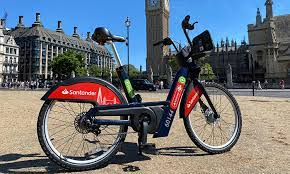
  </a>
</center>




##Carga de Datos ⏫ Data Set: London City Bike Sharing 2015-2017

In [1]:
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib as mpl
from numpy.ma.core import mean
! pip install pingouin
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats
from pingouin import pairwise_ttests
from pandas import json_normalize
# Se monta la unidad y se verifica
from google.colab import drive
import os
drive.mount('/content/gdrive')
#Se inicia lectura de archivo desde la ruta especificada 
%cd '/content/gdrive/MyDrive/'
nybq1= pd.read_csv('london_merged.csv',sep=';')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/gdrive
/content/gdrive/MyDrive


##Abstract 📖


<center>
  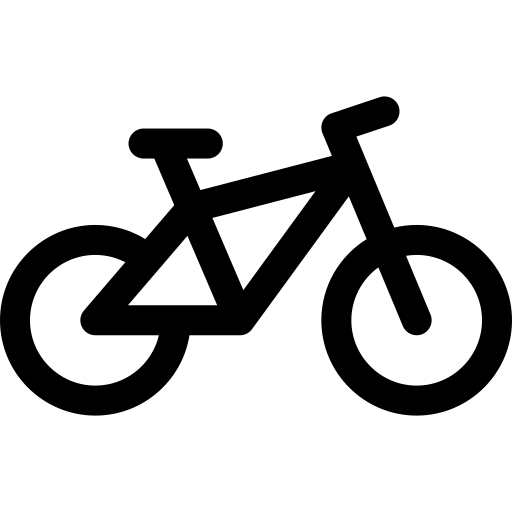

  </center>

Las bicicletas de alquiler ahorran dinero en gasolina y tarifas de estacionamiento, hacen que las ciudades sean más sostenibles y habitables. La gente usa bicicletas de alquiler para una variedad de propósitos; desde el transporte hasta el deporte. Además, el transporte en bicicleta representa el 18% del transporte total en la ciudad de Londres. Esto es gracias a la tecnología en auge que se utiliza en la industria.
El alquiler de bicicletas anima a las personas a mantenerse activas, ya que pueden hacerlo fácilmente y, al mismo tiempo, reducen los niveles de estrés causados por los estilos de vida sedentarios en la sociedad moderna. ¡Las bicicletas de alquiler se han convertido en una parte esencial de la vida Londres tiene muchas empresas de alquiler de bicicletas que funcionan principalmente en los parques y espacios públicos de la ciudad. El próspero negocio de las bicicletas se basa en bicicletas de alta tecnología, que incluyen bicicletas eléctricas, bicicletas de carga y bicicletas plegables para un fácil almacenamiento y transporte. La industria de las bicicletas genera muchos ingresos para las ciudades; Londres gana alrededor de 115 millones de libras esterlinas al año solo con el alquiler de bicicletas. 
Los datos de comportamiento de los usuarios son una herramienta esencial para las operaciones de cualquier negocio. Comprender estos datos ayuda a comprender las necesidades de los clientes y satisfacer esas necesidades creando y escalando servicios. Es por esto por lo que se hace preciso analizar los datos existentes para poder anticipar los patrones de comportamiento de los usuarios y tanto ayudar a mejorar el servicio como maximizar los ingresos.

A continuación un breve video explicativo acerca del funcionamiento de las bicicletas:
*************************************************************************
<center>
  <a href="https://youtu.be/lZv75oHhTEY" target="_blank">
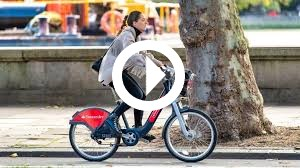
  </a>
</center>

*************************************************************************

Después de analizar los graficos y las hipótesis podemos concluir que:

1. Que tenemos evidencia suficiente para concluir el promedio de la cantidad de alquileres de viaje de las cuatro estaciones definitivamente no es igual. Y que se hace evidente entonces que el promedio de cantidad de alquileres de viaje de los usos en Verano son significativamente mayor que el promedio de la cantidad de alquileres de viaje de los usos en invierno.

2. Que hay suficiente evidencia para demostrar una diferencia que el promedio de la cantidad de alquileres de viaje de en fin de semana no esigual a que si no es fin de semana. Por lo tanto se hace evidente que el promedio de la cantidad de alquileres de viaje de Lunes a Viernes es significativamente mayor que el promedio de la cantidad de alquileres de viaje de en fin de semana.


###Descripción de Variables

Hemos elegido trabajar con el dataset del uso del servicio de alquiler de Bicicletas en la Ciudad de Londres.

Para poder describir mejor nuestro dataset y variables generaremos y mostraremos algunas visualizaciones, que nos ayudaran a entender los datos.

Realizaremos una ingrenieria de factores. Utilizaremos la técnica de Feature Selection y posteriormente la técnica de de Random forest para dererminar las mejores variables para hacer una prediccion y que esas variables nos den un buen resultado.

A continuación de analizarán las variables para posibles utilidades de análisis.
El Data Set incluye:
 
*   🗓**"dateh"** - campo en timestamp para agrupar la información por fecha.
*   🕐**"hour"** - - campo en timestamp para agrupar la información por hora.
*   #️⃣**"lease"** - la cuenta de alquileres de bicicleta.
*   🌡**"t1"** - temperatura en celsius.
*   🌡**"t2"** - sensación térmica en celsius.
*   💧**"hum"** - porcentaje de humedad.
*   🌬**"wind_speed"** - velocidad del viento en km/h.
*   ⛱**"is_holiday"** - solo códigos: 1 feriado / 0 no feriado.
*   ⛱**"is_holiday_desc"** - 1 feriado / 0 no feriado.
*   💤**"is_weekend"** - solo códigos 1 FdS / 0 DdS.
*   💤**"is_weekend"** - 1 FdS / 0 DdS.
*   🌞**"season_type"** - Solo códigos: 0-primavera; 1-Verano; 2-Otoño; 3-Invierno.
*   🌞**"season_type_desc"** - 0-primavera; 1-Verano; 2-Otoño; 3-Invierno.
*   ☂**"weather_code"** - solo códigos: 1 = Despejado; 2 = Nubosidad Variable; 3 = Parcialmente Nublado; 4 = Nublado; 7 = Lluvia; 10 = Tormenta; 26 = Nieve
*   ☂**"weather_code_desc"** =  1 = Despejado; 2 = Nubosidad Variable; 3 = Parcialmente Nublado; 4 = Nublado; 7 = Lluvia; 10 = Tormenta; 26 = Nieve










####Detalle Básico de Variables

In [2]:
nybq1.head()

dateh     hour  lease    t1    t2   hum  wind_speed  weather_code  \
0  25-10-2015  1:00:00    641   9.0   7.0  80.0        47.5             1   
1  17-11-2015  2:00:00    644  15.0  15.0  59.0        56.5             3   
2  08-02-2016  3:00:00    556   9.0   4.0  71.0        56.0             7   
3  28-03-2016  4:00:00     65   5.0  -2.0  87.0        54.0             7   
4  28-03-2016  5:00:00     47   9.0   4.0  73.5        52.0             7   

      weather_code_desc  is_holiday is_holiday_desc  is_weekend  \
0             Despejado           0      No Feriado           1   
1  Parcialmente Nublado           0      No Feriado           0   
2                Lluvia           0      No Feriado           0   
3                Lluvia           1         Feriado           0   
4                Lluvia           1         Feriado           0   

  is_weekend_desc  season_type season_type_desc  
0             FdS            2            Otono  
1             DdS            2            Otono  
2             DdS            3         Invierno  
3             DdS            0        Primavera  
4             DdS            0        Primavera

In [3]:
nybq1.describe()

lease            t1            t2           hum    wind_speed  \
count  17414.000000  17414.000000  17414.000000  17414.000000  17414.000000   
mean    1143.101642     12.468129     11.520874     72.324730     15.915318   
std     1085.108068      5.571805      6.615140     14.312815      7.897845   
min        0.000000     -1.500000     -6.000000     20.500000      0.000000   
25%      257.000000      8.000000      6.000000     63.000000     10.000000   
50%      844.000000     12.500000     12.500000     74.500000     15.000000   
75%     1671.750000     16.000000     16.000000     83.000000     20.500000   
max     7860.000000     34.000000     34.000000    100.000000     56.500000   

       weather_code    is_holiday    is_weekend   season_type  
count  17414.000000  17414.000000  17414.000000  17414.000000  
mean       2.722694      0.022051      0.285403      1.492075  
std        2.341193      0.146854      0.451619      1.118911  
min        1.000000      0.000000      0.000000      0.000000  
25%        1.000000      0.000000      0.000000      0.000000  
50%        2.000000      0.000000      0.000000      1.000000  
75%        3.000000      0.000000      1.000000      2.000000  
max       26.000000      1.000000      1.000000      3.000000

###Objetivos 💢

####Objetivo 1️⃣

Anticipar los patrones de comportamiento de los usuarios y tanto ayudar a mejorar el servicio como maximizar los ingresos, permitiendo facilitar la toma de decisiones en cuanto a recursos y mercadeo, por medio de los datos de uso, datos feriales y clima recolectados a través del rango de tiempo comprendido entre 17-01-2015 y el 03-01-2017.

####Objetivo 2️⃣

Obtener datos del pronóstico del tiempo de la ciudad de Londres para posteriormente poder identificar patrones o hacer predicciones con respecto a los alquileres de bicicletas.

###Contexto Comercial 💲

En la actualidad en la ciudad de Londres, existen diferente empresas que prestan servicio de transporte sustentable variados, desde taxis híbridos, bicicletas y monopatines electricos hasta bicicletas comunes. Es en este ámbito donde la empresa requiere diferenciarse y entregar un servicio de calidad y orientado a cada tipo de usuario, para entregar una experiencia de viaje completa y repetible.
Este análisis permitirá abordar diferentes aristas del servicio para poder contestar aquellas interrogantes que puedan surgir para realizar las mejoras correspondientes al conjunto de elementos que intervienen.

###Problema Comercial 💢



*   El primer problema es que se reciben quejas por parte de los usuarios indicando que en ciertos horarios y espocas del año faltan bicicletas o las estaciones están llenas y no las pueden dejar.
*   Adicionalmente y como segundo problema, las campañas de mercadeo, no están teniendo los resultados esperados dado que no están siendo orientadas correctamente según la época del año, el pronótico del clima o los tipos de día si son feriados, fines de semana o día hábil.




In [4]:
nybqX = nybq1[(nybq1.season_type_desc == 'Invierno') & (nybq1.lease < 100) & (nybq1.weather_code_desc == 'Despejado')]
nybqX

dateh      hour  lease    t1    t2    hum  wind_speed  \
592    23-12-2015  17:00:00     56  11.0  11.0   67.0        32.0   
980    14-01-2015  21:00:00     79   5.0   0.0   66.0        30.0   
987    29-01-2015   4:00:00     34   3.0  -3.0   75.0        30.0   
1485   11-01-2015  22:00:00     74   4.0  -1.0   72.5        28.0   
1489   29-01-2015   2:00:00     33   3.0  -2.0   75.0        28.0   
...           ...       ...    ...   ...   ...    ...         ...   
17343  19-01-2016  16:00:00     21  -1.0  -1.0   86.0         2.0   
17405  04-01-2015   6:00:00     72   2.0   2.0  100.0         0.0   
17408  24-02-2016   9:00:00     74   2.0   2.0   87.0         0.0   
17410  16-02-2016  11:00:00     33   1.0   1.0   93.0         0.0   
17413  19-01-2016  14:00:00     25  -1.0  -1.0   83.0         0.0   

       weather_code weather_code_desc  is_holiday is_holiday_desc  is_weekend  \
592               1         Despejado           0      No Feriado           0   
980               1         Despejado           0      No Feriado           0   
987               1         Despejado           0      No Feriado           0   
1485              1         Despejado           0      No Feriado           1   
1489              1         Despejado           0      No Feriado           0   
...             ...               ...         ...             ...         ...   
17343             1         Despejado           0      No Feriado           0   
17405             1         Despejado           0      No Feriado           1   
17408             1         Despejado           0      No Feriado           0   
17410             1         Despejado           0      No Feriado           0   
17413             1         Despejado           0      No Feriado           0   

      is_weekend_desc  season_type season_type_desc  
592               DdS            3         Invierno  
980               DdS            3         Invierno  
987               DdS            3         Invierno  
1485              FdS            3         Invierno  
1489              DdS            3         Invierno  
...               ...          ...              ...  
17343             DdS            3         Invierno  
17405             FdS            3         Invierno  
17408             DdS            3         Invierno  
17410             DdS            3         Invierno  
17413             DdS            3         Invierno  

[246 rows x 15 columns]

De ese dataset, traemos los datos corresponientes a Invierno, dado que esa es la estacion en la que actualmente está Londres y nuestros pronosticos del tiempo que traemos desde la API son actuales.

In [5]:
nybq2 = nybq1[nybq1['season_type_desc'] == 'Invierno'] 
nybq2=nybq2.drop(['weather_code','weather_code_desc','is_holiday','is_holiday_desc','is_weekend', 'is_weekend_desc','season_type'],axis=1)
df_nybq2= nybq2.copy()
nybq2.head()

dateh      hour  lease    t1    t2   hum  wind_speed season_type_desc
2   08-02-2016   3:00:00    556   9.0   4.0  71.0        56.0         Invierno
6   08-02-2016   7:00:00    964   9.0   4.0  66.0        51.0         Invierno
8   08-02-2016   9:00:00    612   9.5   5.0  64.5        49.5         Invierno
9   10-01-2015  10:00:00    619  14.0  14.0  77.0        48.0         Invierno
17  01-02-2016  18:00:00   1534  13.0  13.0  55.0        47.0         Invierno

###Contexto Analítico 👁‍🗨

Inicialmente se realiza un levantamiento de los cuestionamientos a partir de los problemas y el contexto, pudiendo identificar las siguientes preguntas comerciales:

*   ¿Es factible tener alguna medida, bien sea de cantidad de usos de parte de los usuarios, diferenciadas por temporada que permita ser utilizada como indicador en cuanto a las gestiones de capacidad?
*   ¿Es factible poder conocer la el uso de los usuarios en cuanto dependiendo de la temperatura, pronóstico del clima, temporada, dia u hora para poder abordar de mejor manera las campañas de mercadeo?

Luego de internalizados los problemas y el contexto se generarán visualizaciones con resúmenes numéricos junto las interpretaciones respectivas que permitan responder las hipótesis planteadas, a continuación. 

##Hipótesis ❔

###Hipótesis 1️⃣

**Hipótesis Nula**: ¿Será el promedio de la cantidad de alquileres de viaje de las cuatro estaciones iguales?

**Hipótesis de Investigación**:¿Será el promedio de cantidad de alquileres de viaje de los usos en Verano, significativamente mayor que el promedio de la cantidad de alquileres de viaje de los usos en invierno?

###Hipótesis 2️⃣

**Hipótesis Nula**: ¿Será el promedio de la cantidad de alquileres de viaje de en fin de semana igual a que si no es fin de semana?

**Hipótesis de Investigación**:¿Será el promedio de la cantidad de alquileres de viaje de Lunes a Viernes, significativamente mayor que el promedio de la cantidad de alquileres de viaje de en fin de semana?

##APIS 👾

###Creacion de API Key

Ingresamos a www.openweather.org para poder capturar datos del tiempo de la ciudad de Londres.


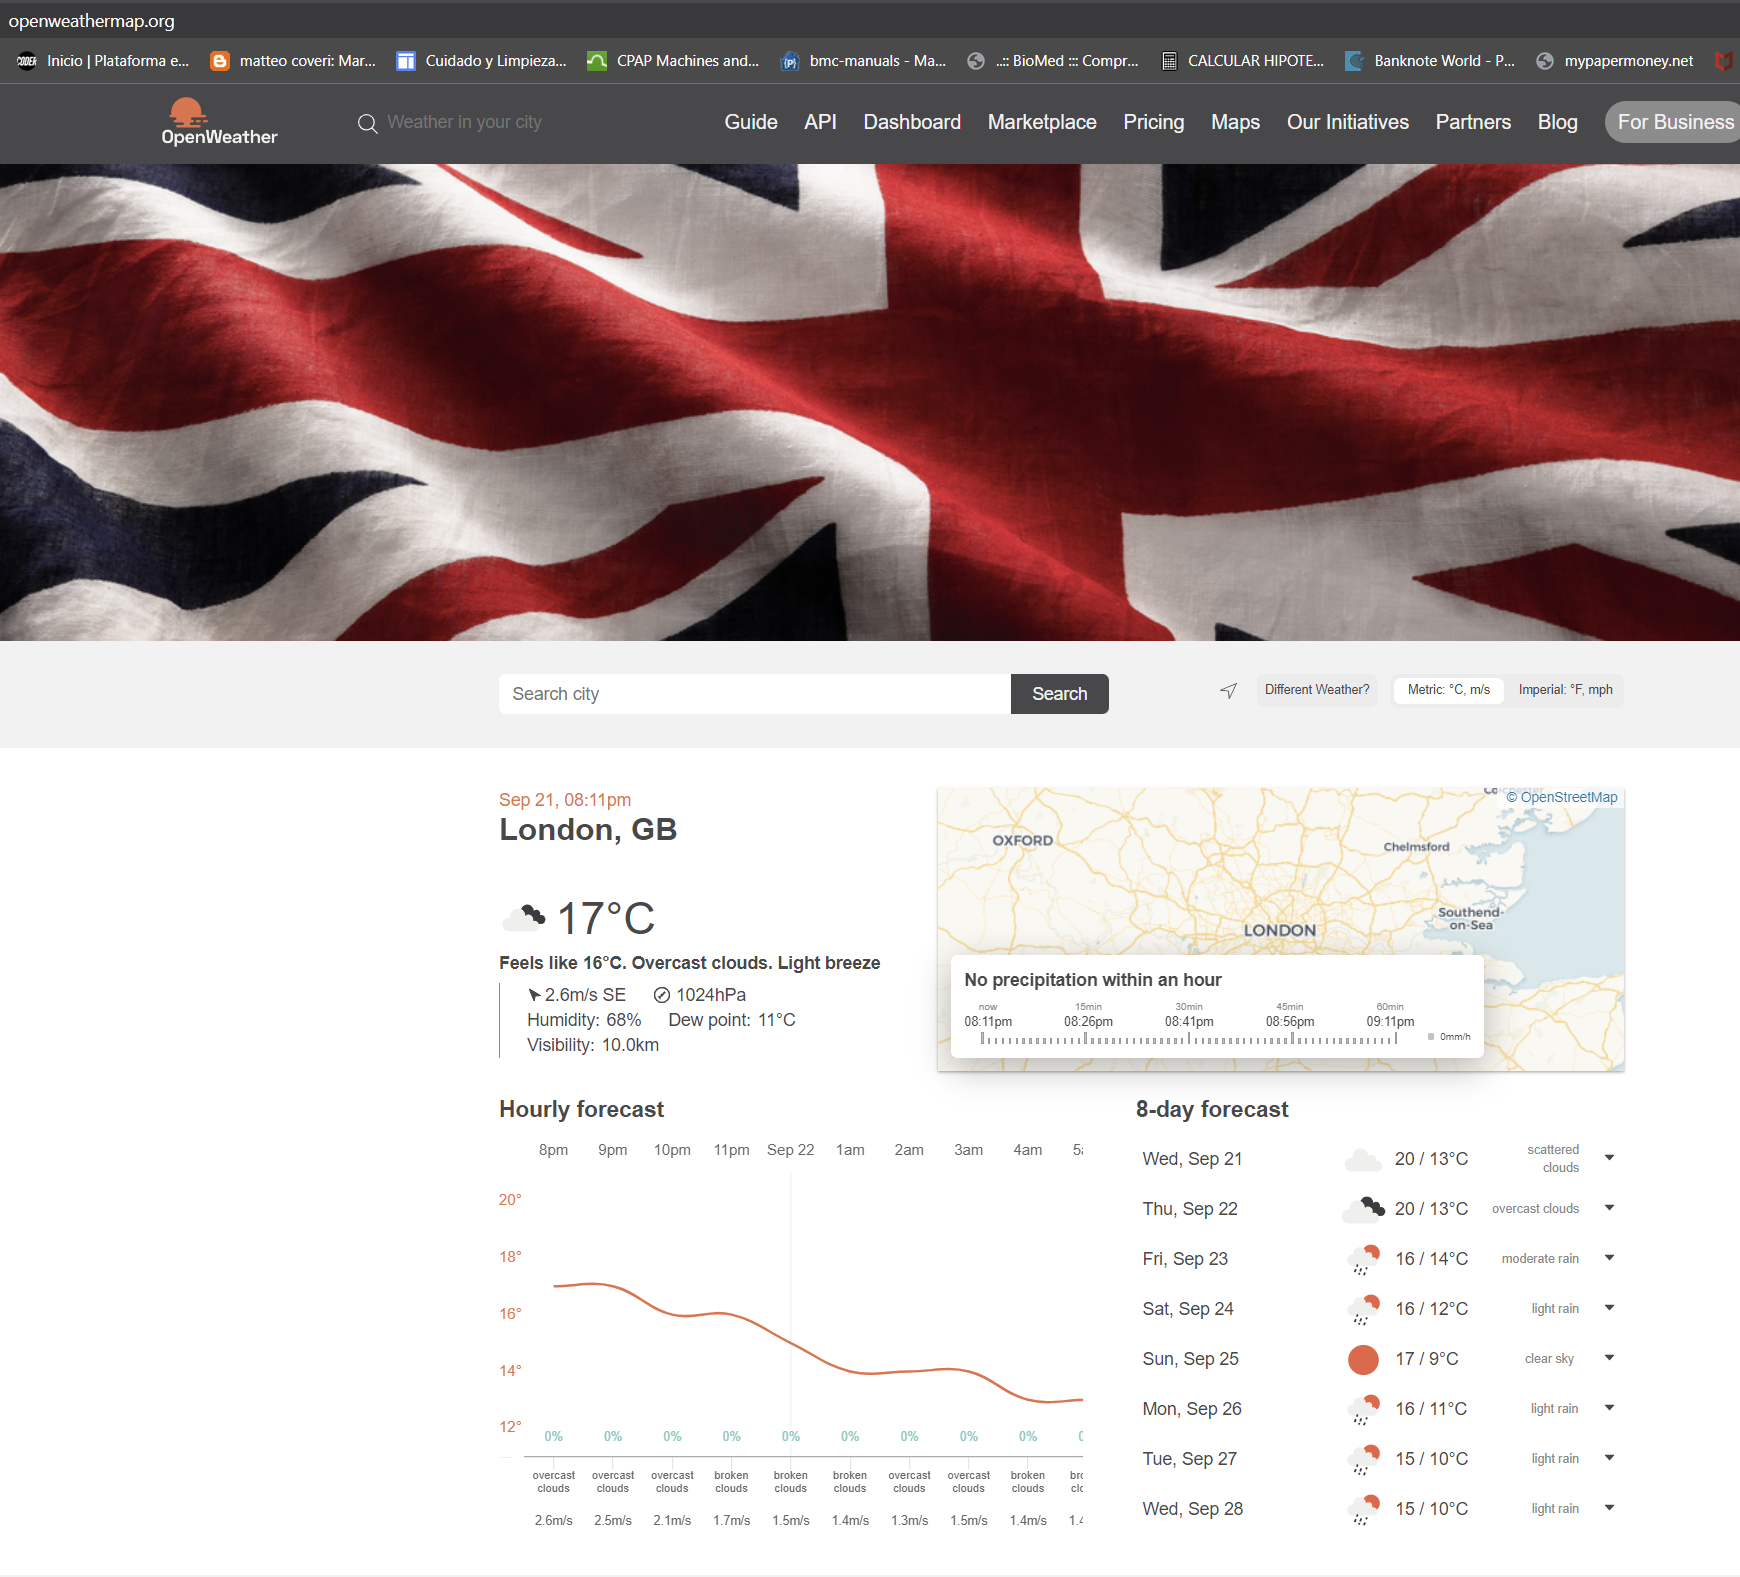

Creamos una cuenta y posterior a ello una API Key

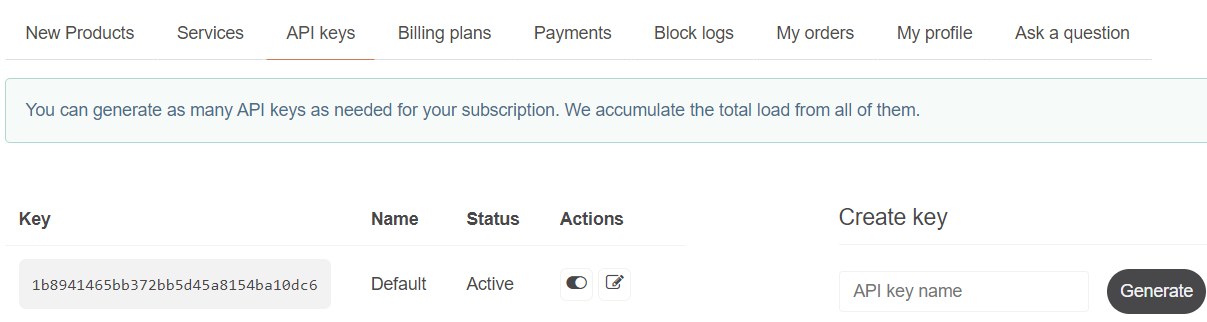

La cuenta gratuita solo permite obtener un pronóstico de 5 días en espacios de 3 horas.
Accedemos a la documentacion de la API para comprender cómo realizar la llamada a los datos.

<center>
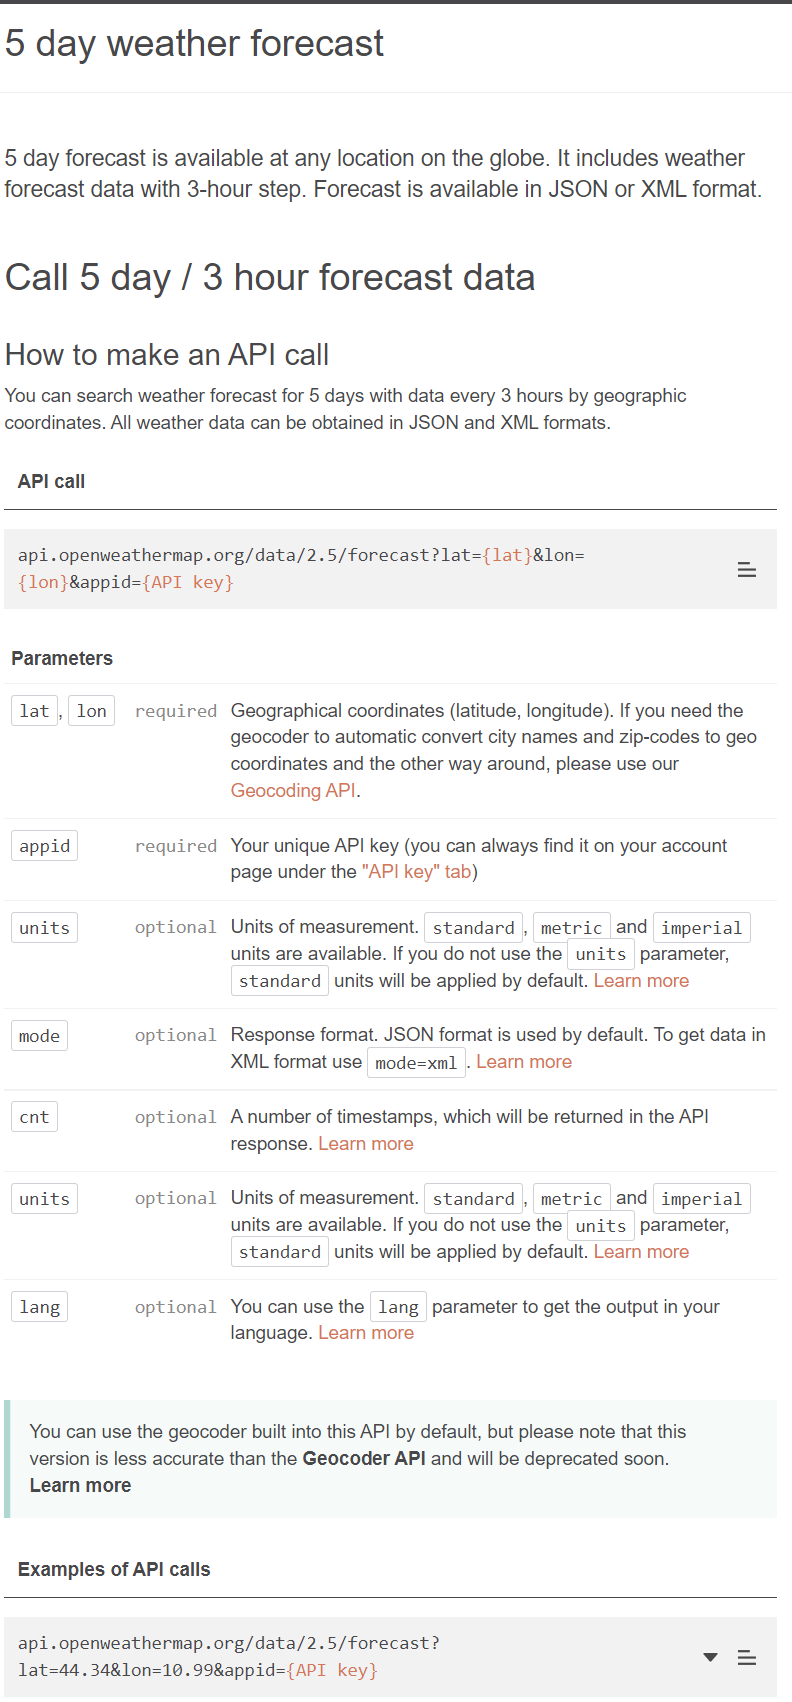
  </a>
</center>

###Carga de Datos desde la API

Se realiza la importacion de datos desde la URL proporcionada indicando los parámetros basícos requeridos, tales como : la Lat y Lon de la ciudad de Londres y la API Key. Adicionalemnte, agregamos el parametro opcional "Units" para que entregue los datos en formato métrico.

In [6]:
url='https://api.openweathermap.org/data/2.5/forecast?lat=52.520551&lon=-0.07944&units=metric&appid=1b8941465bb372bb5d45a8154ba10dc6' #cargamos los datos desde la API
dfx= requests.get(url)
print(dfx)

<Response [200]>


Luego de obtenido satisfactoriamente un código 200 se procede a realizar la primera visualizacion de datos.

En ella revisamos la extencion en cantidad de caracteres. La cantidad de registros no es cuantioda dada la limitacion de la API con respecto a la gratuidad de la cuenta. 5 días en espacio de 3 horas implican unos 40 registros con unas 21 columnas.

***Para tener en consideración: Es posible que el proveedor de datos haga cambios en el orden de las columnas que se traen a través de la API ocasionando que algunos gráficos no se generen correctamente.***

In [7]:
print(len(dfx.text))
dfx.text

15695


'{"cod":"200","message":0,"cnt":40,"list":[{"dt":1674151200,"main":{"temp":0.87,"feels_like":-3.19,"temp_min":-0.29,"temp_max":0.87,"pressure":1008,"sea_level":1008,"grnd_level":1008,"humidity":79,"temp_kf":1.16},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"clouds":{"all":8},"wind":{"speed":3.97,"deg":282,"gust":10.99},"visibility":10000,"pop":0,"sys":{"pod":"n"},"dt_txt":"2023-01-19 18:00:00"},{"dt":1674162000,"main":{"temp":0.74,"feels_like":-3.74,"temp_min":0.47,"temp_max":0.74,"pressure":1009,"sea_level":1009,"grnd_level":1010,"humidity":81,"temp_kf":0.27},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02n"}],"clouds":{"all":19},"wind":{"speed":4.57,"deg":274,"gust":11.38},"visibility":10000,"pop":0,"sys":{"pod":"n"},"dt_txt":"2023-01-19 21:00:00"},{"dt":1674172800,"main":{"temp":0.72,"feels_like":-4.22,"temp_min":0.64,"temp_max":0.72,"pressure":1011,"sea_level":1011,"grnd_level":1011,"humidity":86,"temp_kf":0.08},"weather":

Posteriormente cargamos el texto anterior para ser visualizados en formato JSON. Como se puede apreciar existen multiples niveles dentro de la estructura lo que puede complejizar la extraccion y limpieza.

In [8]:
texto=dfx.text
json.loads(texto)

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1674151200,
   'main': {'temp': 0.87,
    'feels_like': -3.19,
    'temp_min': -0.29,
    'temp_max': 0.87,
    'pressure': 1008,
    'sea_level': 1008,
    'grnd_level': 1008,
    'humidity': 79,
    'temp_kf': 1.16},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01n'}],
   'clouds': {'all': 8},
   'wind': {'speed': 3.97, 'deg': 282, 'gust': 10.99},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'n'},
   'dt_txt': '2023-01-19 18:00:00'},
  {'dt': 1674162000,
   'main': {'temp': 0.74,
    'feels_like': -3.74,
    'temp_min': 0.47,
    'temp_max': 0.74,
    'pressure': 1009,
    'sea_level': 1009,
    'grnd_level': 1010,
    'humidity': 81,
    'temp_kf': 0.27},
   'weather': [{'id': 801,
     'main': 'Clouds',
     'description': 'few clouds',
     'icon': '02n'}],
   'clouds': {'all': 19},
   'wind': {'speed': 4.57, 'deg': 274, 'gust': 11.38},
   'visibility': 10000,
  

Se extrae del JSON a un DataFrame por el atriburo "List"
Sin embargo se encuentran anidaciones internas

In [9]:
df2=pd.DataFrame.from_dict(dfx.json()['list'])
df2.head()

dt                                               main  \
0  1674151200  {'temp': 0.87, 'feels_like': -3.19, 'temp_min'...   
1  1674162000  {'temp': 0.74, 'feels_like': -3.74, 'temp_min'...   
2  1674172800  {'temp': 0.72, 'feels_like': -4.22, 'temp_min'...   
3  1674183600  {'temp': 0.64, 'feels_like': -3.82, 'temp_min'...   
4  1674194400  {'temp': 0.38, 'feels_like': -4.1, 'temp_min':...   

                                             weather       clouds  \
0  [{'id': 800, 'main': 'Clear', 'description': '...   {'all': 8}   
1  [{'id': 801, 'main': 'Clouds', 'description': ...  {'all': 19}   
2  [{'id': 801, 'main': 'Clouds', 'description': ...  {'all': 20}   
3  [{'id': 800, 'main': 'Clear', 'description': '...   {'all': 7}   
4  [{'id': 800, 'main': 'Clear', 'description': '...   {'all': 7}   

                                         wind  visibility  pop           sys  \
0  {'speed': 3.97, 'deg': 282, 'gust': 10.99}       10000    0  {'pod': 'n'}   
1  {'speed': 4.57, 'deg': 274, 'gust': 11.38}       10000    0  {'pod': 'n'}   
2  {'speed': 5.37, 'deg': 288, 'gust': 12.34}       10000    0  {'pod': 'n'}   
3   {'speed': 4.5, 'deg': 283, 'gust': 10.72}       10000    0  {'pod': 'n'}   
4  {'speed': 4.43, 'deg': 289, 'gust': 10.68}       10000    0  {'pod': 'n'}   

                dt_txt  
0  2023-01-19 18:00:00  
1  2023-01-19 21:00:00  
2  2023-01-20 00:00:00  
3  2023-01-20 03:00:00  
4  2023-01-20 06:00:00

Utilizamos un método para poder aplicar la normalizacion correspondiente y así poder hacer que las columnas anidadas sean reconocidas.

Sin embargo el resultado no es satisfactorio dado que genera un bloque de datos dentro del mismo data frame con cada sub nivel de JSON.

In [10]:
info = json.loads(texto) #Luego convertimos ese resultado de la normalizacion del JSON nuevamente en un Dataframe para poder observarlo mejor
df3 = json_normalize(info['list']) 
print(df3)

            dt                                            weather  visibility  \
0   1674151200  [{'id': 800, 'main': 'Clear', 'description': '...       10000   
1   1674162000  [{'id': 801, 'main': 'Clouds', 'description': ...       10000   
2   1674172800  [{'id': 801, 'main': 'Clouds', 'description': ...       10000   
3   1674183600  [{'id': 800, 'main': 'Clear', 'description': '...       10000   
4   1674194400  [{'id': 800, 'main': 'Clear', 'description': '...       10000   
5   1674205200  [{'id': 800, 'main': 'Clear', 'description': '...       10000   
6   1674216000  [{'id': 800, 'main': 'Clear', 'description': '...       10000   
7   1674226800  [{'id': 803, 'main': 'Clouds', 'description': ...       10000   
8   1674237600  [{'id': 803, 'main': 'Clouds', 'description': ...       10000   
9   1674248400  [{'id': 800, 'main': 'Clear', 'description': '...       10000   
10  1674259200  [{'id': 800, 'main': 'Clear', 'description': '...       10000   
11  1674270000  [{'id': 800,

###API Data Wrangling 🤠

####Descubrimiento

Luego convertimos ese resultado de la normalizacion del JSON nuevamente en un Dataframe para poder observarlo mejor

In [11]:
df4 = pd.DataFrame(df3)
df4.head()

dt                                            weather  visibility  \
0  1674151200  [{'id': 800, 'main': 'Clear', 'description': '...       10000   
1  1674162000  [{'id': 801, 'main': 'Clouds', 'description': ...       10000   
2  1674172800  [{'id': 801, 'main': 'Clouds', 'description': ...       10000   
3  1674183600  [{'id': 800, 'main': 'Clear', 'description': '...       10000   
4  1674194400  [{'id': 800, 'main': 'Clear', 'description': '...       10000   

   pop               dt_txt  main.temp  main.feels_like  main.temp_min  \
0    0  2023-01-19 18:00:00       0.87            -3.19          -0.29   
1    0  2023-01-19 21:00:00       0.74            -3.74           0.47   
2    0  2023-01-20 00:00:00       0.72            -4.22           0.64   
3    0  2023-01-20 03:00:00       0.64            -3.82           0.64   
4    0  2023-01-20 06:00:00       0.38            -4.10           0.38   

   main.temp_max  main.pressure  main.sea_level  main.grnd_level  \
0           0.87           1008            1008             1008   
1           0.74           1009            1009             1010   
2           0.72           1011            1011             1011   
3           0.64           1013            1013             1013   
4           0.38           1015            1015             1015   

   main.humidity  main.temp_kf  clouds.all  wind.speed  wind.deg  wind.gust  \
0             79          1.16           8        3.97       282      10.99   
1             81          0.27          19        4.57       274      11.38   
2             86          0.08          20        5.37       288      12.34   
3             93          0.00           7        4.50       283      10.72   
4             92          0.00           7        4.43       289      10.68   

  sys.pod  
0       n  
1       n  
2       n  
3       n  
4       n

Nos damos cuenta que la columna que no pudo ser normalizada, contiene data que no nos es relevante:

'weather': [{'id': 500,
     'main': 'Rain',
     'description': 'light rain',
     'icon': '10d'}],

No es relevante dado que en nuestro dataset inicial tenemos principalmente: temperatura real y sensasional, humedad velocidad del viento.
Esto nos lleva a eliminar esta y otras columnas que no son de interés para nuestro objetivo.

In [12]:
df5=df4.drop(['weather','dt','visibility','main.sea_level','main.grnd_level', 'main.temp_kf','wind.deg', 'wind.gust' ],axis=1)
df5.head()

pop               dt_txt  main.temp  main.feels_like  main.temp_min  \
0    0  2023-01-19 18:00:00       0.87            -3.19          -0.29   
1    0  2023-01-19 21:00:00       0.74            -3.74           0.47   
2    0  2023-01-20 00:00:00       0.72            -4.22           0.64   
3    0  2023-01-20 03:00:00       0.64            -3.82           0.64   
4    0  2023-01-20 06:00:00       0.38            -4.10           0.38   

   main.temp_max  main.pressure  main.humidity  clouds.all  wind.speed sys.pod  
0           0.87           1008             79           8        3.97       n  
1           0.74           1009             81          19        4.57       n  
2           0.72           1011             86          20        5.37       n  
3           0.64           1013             93           7        4.50       n  
4           0.38           1015             92           7        4.43       n

####Correlacion

Punto explicado más adelante en el EDA

####Verificacion de Nulos

In [13]:
sum(df5.isnull().sum())

0

In [14]:
df5.isnull().sum()

pop                0
dt_txt             0
main.temp          0
main.feels_like    0
main.temp_min      0
main.temp_max      0
main.pressure      0
main.humidity      0
clouds.all         0
wind.speed         0
sys.pod            0
dtype: int64

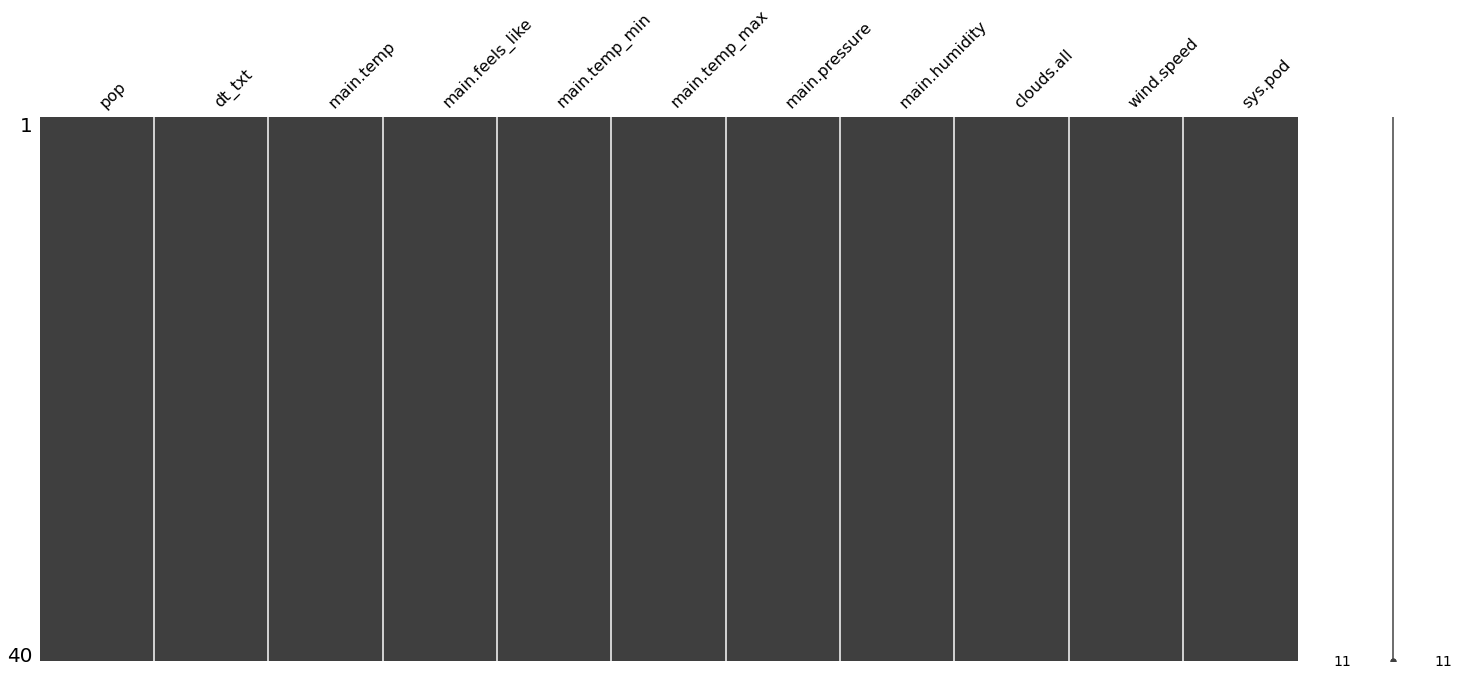

In [15]:
import missingno as mnso 
mnso.matrix(df5)

Según la epoca del año al parecer, la API entrega o no un dato adicional. Cuando se realizó este estudio hace algunos meses, la API incluía una variabla denominada **rain_3h**. De dicha variable sacamos esta conclusión:
  Se puede observar que el campo rain.3h es el unico que contiene una gran cantidad de nulos (32/40).

  **Este campo indica la probabilidad de lluvia en un periodo de 3 horas de 0 a 1 Sin embargo, podemos iferir que los NaN no necesariamente es data faltante sino data correspondiente a la nula probabilidad de lluvia, o sea 0.
Esto nos lleva a poder realizar una sustitucion simple de NaN==>0**

Si bien esta variable no volvió a aparecer, nos parecio importqante dejar el analisis previo para futuras revisiones. 

####Verificacion de Duplicados

In [16]:
print(df5.shape)
df5= df5.drop_duplicates()
print(df5.shape)

(40, 11)
(40, 11)


No se encontraron duplicados

Dado que los nombres de las columnas contienen un punto (.), ciertos métodos pueden fallas, como el error siguiente. Es por eso que se ha reemplazado el punto por guión bajo. Esto se realizará de manera masiva en la etapa de estructuración.

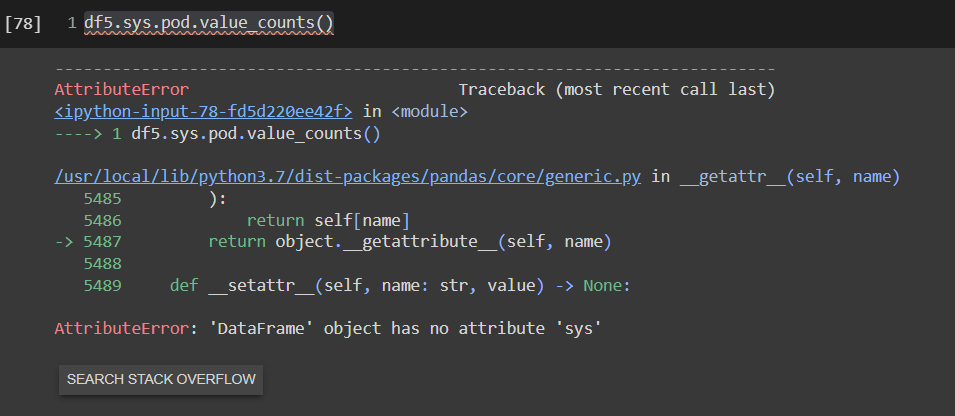

In [17]:
df5.columns=['pop',	'dt_txt',	'temp', 'feels_like',	'temp_min',	'temp_max',	'pressure',	'humidity',	'clouds_all',	'wind_speed',	'sys_pod']
#df5.columns=['pop',	'dt_txt',	'temp', 'feels_like',	'temp_min',	'temp_max',	'pressure',	'humidity',	'clouds_all',	'wind_speed',	'rain_3h','sys_pod'] #Solo en caso de recibir la variable
df5.columns

Index(['pop', 'dt_txt', 'temp', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'clouds_all', 'wind_speed', 'sys_pod'],
      dtype='object')

In [18]:
df5.sys_pod.value_counts()

n    25
d    15
Name: sys_pod, dtype: int64

Tenemos entonces que 25 de los pronósticos se refiueren a la noche y 15 al día.

####Estructuración


In [19]:
df6= df5.copy()
df6.head()

pop               dt_txt  temp  feels_like  temp_min  temp_max  pressure  \
0    0  2023-01-19 18:00:00  0.87       -3.19     -0.29      0.87      1008   
1    0  2023-01-19 21:00:00  0.74       -3.74      0.47      0.74      1009   
2    0  2023-01-20 00:00:00  0.72       -4.22      0.64      0.72      1011   
3    0  2023-01-20 03:00:00  0.64       -3.82      0.64      0.64      1013   
4    0  2023-01-20 06:00:00  0.38       -4.10      0.38      0.38      1015   

   humidity  clouds_all  wind_speed sys_pod  
0        79           8        3.97       n  
1        81          19        4.57       n  
2        86          20        5.37       n  
3        93           7        4.50       n  
4        92           7        4.43       n

#####Estandarización de magnitudes

Se convierte la velocidad del viento de m/s a km/h

In [20]:
df6['wind_speed']= (df6['wind_speed']/1000)*3600 #Se convierte la velocidad del viento de m/s a km/h
df6.head(2)

pop               dt_txt  temp  feels_like  temp_min  temp_max  pressure  \
0    0  2023-01-19 18:00:00  0.87       -3.19     -0.29      0.87      1008   
1    0  2023-01-19 21:00:00  0.74       -3.74      0.47      0.74      1009   

   humidity  clouds_all  wind_speed sys_pod  
0        79           8      14.292       n  
1        81          19      16.452       n

In [21]:
df6.shape

(40, 11)

40 Resgistos, dado que la API en su versión gratuita entrega 5 días de pronosticos dividido en 3 horas cada uno.
Restan 11 columnas de interés las cuales son:

pop	
dt_txt	
main.temp	
main.feels_like	
main.temp_min	
main.temp_max	
main.pressure	
main.humidity	
clouds.all	
wind.speed	
sys.pod	
**rain.3h** En el caso de que sea vuelta a entregar por parte de la API

In [22]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pop         40 non-null     int64  
 1   dt_txt      40 non-null     object 
 2   temp        40 non-null     float64
 3   feels_like  40 non-null     float64
 4   temp_min    40 non-null     float64
 5   temp_max    40 non-null     float64
 6   pressure    40 non-null     int64  
 7   humidity    40 non-null     int64  
 8   clouds_all  40 non-null     int64  
 9   wind_speed  40 non-null     float64
 10  sys_pod     40 non-null     object 
dtypes: float64(5), int64(4), object(2)
memory usage: 3.8+ KB


Se ve que los tipos de datos están en su mayoría bien asignados. 

Se reacomodan los nombres de las columnas

In [23]:
df6.columns=['pop',	'dt_txt',	'temp', 'feels_like',	'temp_min',	'temp_max',	'pressure',	'humidity',	'clouds_all',	'wind_speed',	'sys_pod']
#df6.columns=['pop',	'dt_txt',	'temp', 'feels_like',	'temp_min',	'temp_max',	'pressure',	'humidity',	'clouds_all',	'wind_speed',	'sys_pod',	'rain_3h'] #Solo en caso de recibir la variable
df6.columns
df6.head(2)

pop               dt_txt  temp  feels_like  temp_min  temp_max  pressure  \
0    0  2023-01-19 18:00:00  0.87       -3.19     -0.29      0.87      1008   
1    0  2023-01-19 21:00:00  0.74       -3.74      0.47      0.74      1009   

   humidity  clouds_all  wind_speed sys_pod  
0        79           8      14.292       n  
1        81          19      16.452       n

####Limpieza (Solo en el caso de recibir rain_3h)

Según la observacion que habíamos realizado anteriormente, encontramos que los NaN no eran un error ni falta de datos, sino a que para ese registro en particula la probabilidad de lluvia era 0, por lo tanto fueron reemplazados los NaN por 0 con la funcion fillna(0).
La usamos de esta manera en todo el dataframe porque pudimos corroborar que la unica columna con NaN's era rain_3h.

In [ ]:
#df6 = df6.fillna(0) # Según la observacion que habíamos realizado anteriormente, encontramos que los NaN no eran un error ni falta de datos, sino a que para ese registro en particula la probabilidad de lluvia era 0, por lo tanto fueron reemplazados los NaN por 0 con la funcion fillna(0).
#La usamos de esta manera en todo el dataframe porque pudimos corroborar que la unica columna con NaN's era rain_3h.
#df6.head(2)

pop               dt_txt   temp  feels_like  temp_min  temp_max  pressure  \
0  0.0  2022-10-31 03:00:00  11.62       11.06     11.62     11.67      1015   
1  0.0  2022-10-31 06:00:00  11.44       10.99     11.37     11.44      1015   

   humidity  clouds_all  wind_speed sys_pod  rain_3h  
0        85          87      15.660       n      0.0  
1        90          83      14.796       n      0.0

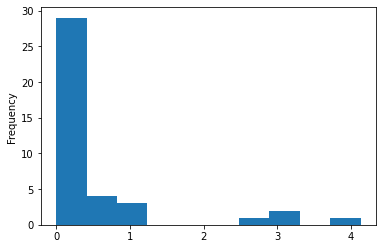

In [ ]:
#df6['rain_3h'].plot(kind='hist')

Efectivamente, para esta epoca de año: Final del Verano (Otoño), el pronostico de lluvia tiende a ser bastante bajo.

####Enriquecimiento

Cargamos nuestro dataset principal

In [24]:
nybq1.head(2)

dateh     hour  lease    t1    t2   hum  wind_speed  weather_code  \
0  25-10-2015  1:00:00    641   9.0   7.0  80.0        47.5             1   
1  17-11-2015  2:00:00    644  15.0  15.0  59.0        56.5             3   

      weather_code_desc  is_holiday is_holiday_desc  is_weekend  \
0             Despejado           0      No Feriado           1   
1  Parcialmente Nublado           0      No Feriado           0   

  is_weekend_desc  season_type season_type_desc  
0             FdS            2            Otono  
1             DdS            2            Otono

De ese dataset, traemos los datos corresponientes a Invierno, dado que esa es la estacion en la que actualmente está Londres y nuestros pronosticos del tiempo que traemos desde la API son actuales.

In [25]:
nybq2 = nybq1[nybq1['season_type_desc'] == 'Invierno'] 
nybq2.head(2)

dateh     hour  lease   t1   t2   hum  wind_speed  weather_code  \
2  08-02-2016  3:00:00    556  9.0  4.0  71.0        56.0             7   
6  08-02-2016  7:00:00    964  9.0  4.0  66.0        51.0             3   

      weather_code_desc  is_holiday is_holiday_desc  is_weekend  \
2                Lluvia           0      No Feriado           0   
6  Parcialmente Nublado           0      No Feriado           0   

  is_weekend_desc  season_type season_type_desc  
2             DdS            3         Invierno  
6             DdS            3         Invierno

In [26]:
nybq2=nybq2.drop(['weather_code','weather_code_desc','is_holiday','is_holiday_desc','is_weekend', 'is_weekend_desc','season_type'],axis=1)
nybq2.head(2)

dateh     hour  lease   t1   t2   hum  wind_speed season_type_desc
2  08-02-2016  3:00:00    556  9.0  4.0  71.0        56.0         Invierno
6  08-02-2016  7:00:00    964  9.0  4.0  66.0        51.0         Invierno

In [27]:
df6.head(2)

pop               dt_txt  temp  feels_like  temp_min  temp_max  pressure  \
0    0  2023-01-19 18:00:00  0.87       -3.19     -0.29      0.87      1008   
1    0  2023-01-19 21:00:00  0.74       -3.74      0.47      0.74      1009   

   humidity  clouds_all  wind_speed sys_pod  
0        79           8      14.292       n  
1        81          19      16.452       n

**En este caso en particular no encontramos conjunción en la cual podamos hacer un "merge" de ambos dataframes.**

####Validacion

In [28]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 22.0 MB 22.6 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 29.0 MB/s eta 0:00:00
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=328711 sha256=8586f8bd03d9b2e93c7e578f5cfb805ca0d1069bdf67fe2188c3e5a1c694a3e2
  Stored in directory: /tmp/pip-ephem-wheel-cache-lx7kr0ud/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=007342befde735734edf9c3b5a882a1be998bd3e898ecad173433071f99e17c2
  Stored in 

In [29]:
from pandas_profiling import ProfileReport
perfil=ProfileReport(df6)

En este caso realizamos un analisis de las variables de la API

In [30]:
perfil.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

En este otro caso realizamos un analisis de las variables del dataset **nbyq2** el cual es un dataset acotado segun se pudo a preciar en pasos anteriores.

In [31]:
perfil2=ProfileReport(nybq2)
perfil2.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

####Publicacion

In [32]:
perfil.to_file("Reporte_Dataset_API.html")
perfil2.to_file("Reporte_Dataset_LondonBike.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##Análisis Exploratorio de los Datos (EDA) 🔬

###Profiling para Ánalisis Básico

####Instalacion de Librería

Se instaló en el paso anterior.

####Análisis Univariado

EN este caso realizamos un anailis univariado de cada variable del dataset original **nybq1**

In [33]:
from pandas_profiling import ProfileReport
profile = ProfileReport(nybq1, title='Mi resumen')
profile.to_widgets()

/usr/local/lib/python3.8/dist-packages/pandas_profiling/profile_report.py:452: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

####EDA Gráfico

<ipython-input-35-96561f9417a7>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df1.dataframeName = nybq1
<ipython-input-35-96561f9417a7>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


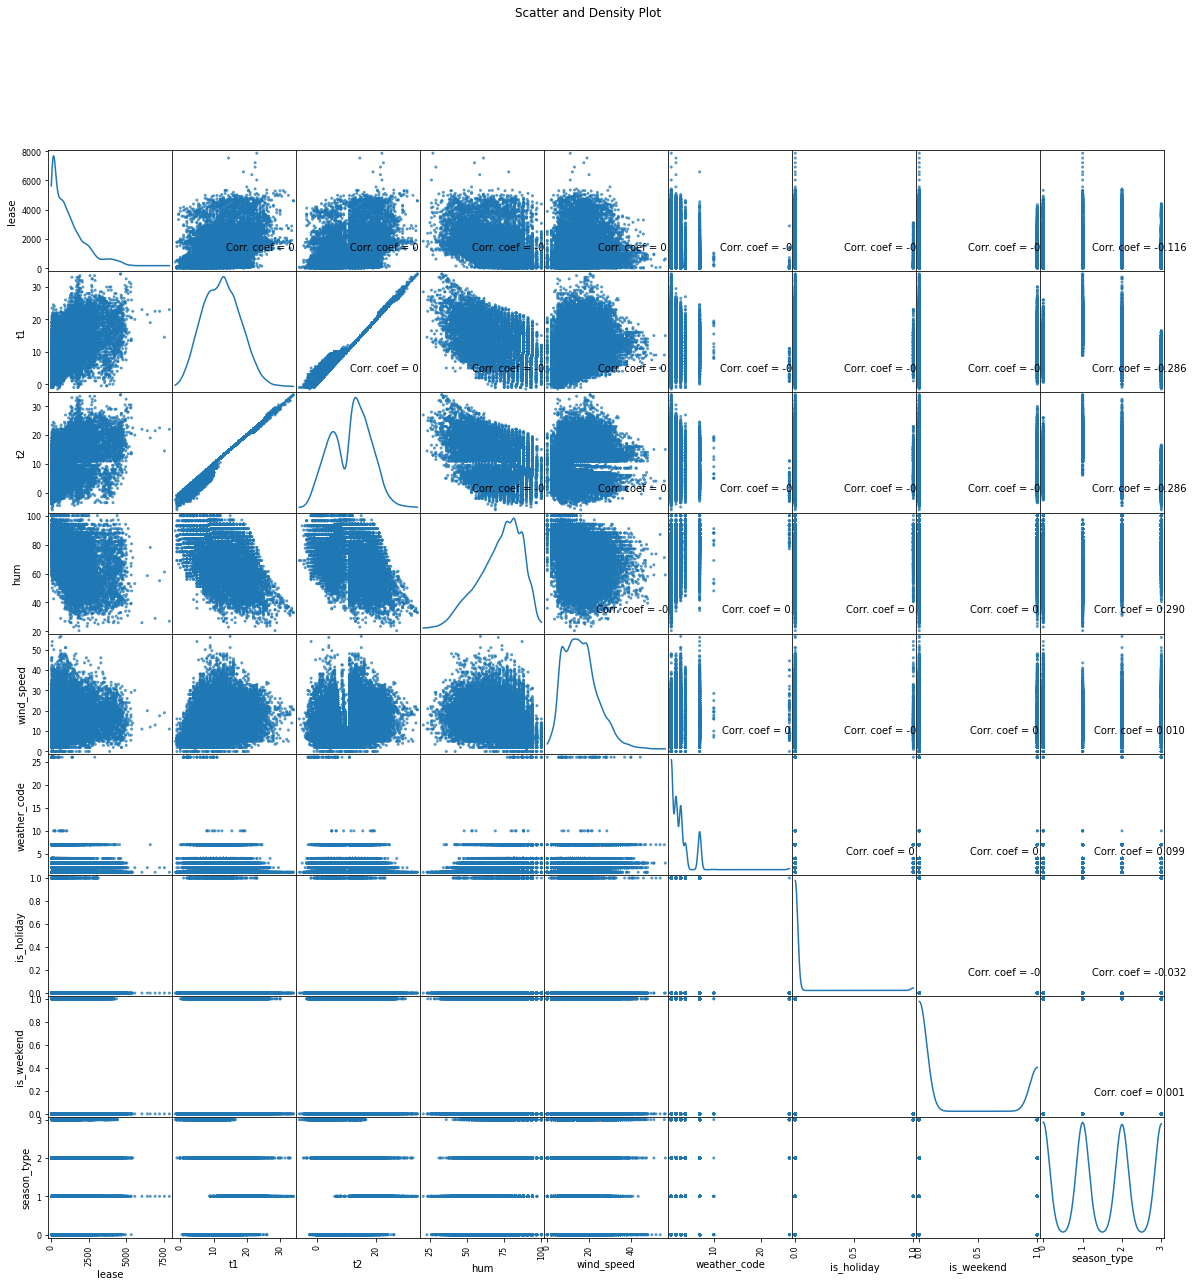

In [35]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # mantener solo columnas numéricas
    # Eliminar filas y columnas que llevarían a df a ser singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] #mantener columnas donde hay más de 1 valores únicos
    columnNames = list(df)
    if len(columnNames) > 10: #reducir el número de columnas para la inversión de matriz de las gráficas de densidad kernel
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
df1=nybq1
df1.dataframeName = nybq1
plotScatterMatrix(nybq1, 20, 10)

Se puede observar que los arriendos por hora se concentran en aquellas con pocas cantidades, teniendo outlayer superiores a 8000, sin embargo siendo igualmente válidos. Se aprecia que estas mismas concentraciones se distribuyen en temperaturas mayores a 0°C hasta 20°C, en humedades oscilando entre el 60% y el 100% y vientos entre 0 kmph y 30 kmph. Tambien se pueden ver concentraciones inmportantes en días despejados, durante la semana. No se ven diferencias importantes entre las temporadas.

Text(0.5, 1.0, 'Correlacion de variables API')

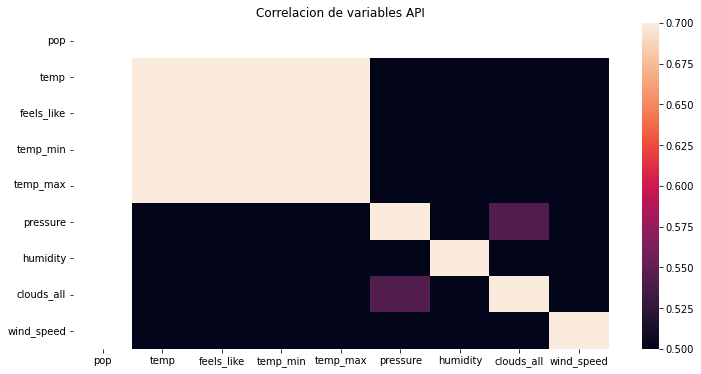

In [36]:
plt.figure(figsize=(12,6))
sns.heatmap(df6.corr(), vmin=0.5, vmax=0.7)
plt.title("Correlacion de variables API")

En este Mapa de calor podemos observar la correlación entre las diferentes variables que nos aporta la API sobre el pronostico del clima de los próximos días. 

Como era de esperar las variables vinculadas a la temperatura (temperatura, sensacion térmica, temperaturas maximas y minimas) se encuentran fuertemente relacionadas entre si.

La humedad tiene una correlación negativa con las variables de temperatura.

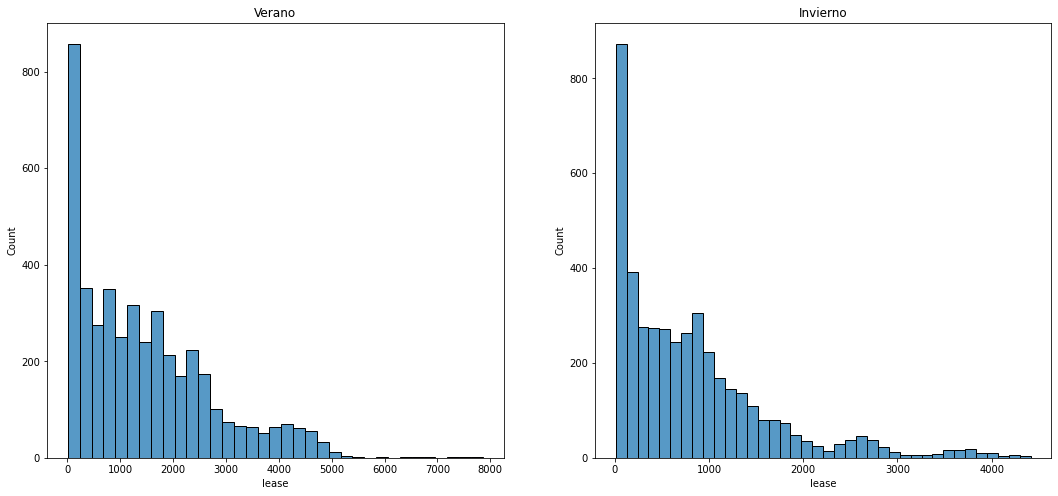

In [37]:
verano = nybq1.query("season_type_desc == 'Verano'")
invierno = nybq1.query("season_type_desc == 'Invierno'")
plt.figure(figsize=(18,8))
plt.subplot(121)
sns.histplot(data=verano, x="lease")
plt.title("Verano");
plt.subplot(122)
sns.histplot(data=invierno, x="lease")
plt.title("Invierno");

Se tiene una mayor concentración de registros con pocos alquileres que aquellos con la mayor cantidad de alquileres por dia/hora. Esta tendendia es repetible tanto en invierno como en verano. Se puede observar que mas de 800 registros tienen entre 0 y 250 alquileres. Mientras que, por ejemplo en verano, muy pocos registros alcanzan los máximos de alquileres (+7000).

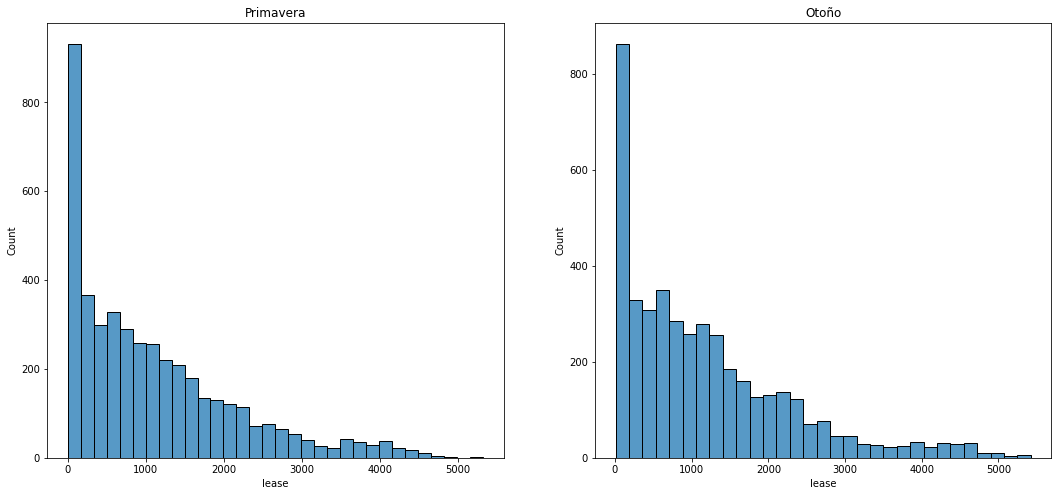

In [38]:
primavera = nybq1.query("season_type_desc == 'Primavera'")
otono = nybq1.query("season_type_desc == 'Otono'")
plt.figure(figsize=(18,8))
plt.subplot(121)
sns.histplot(data=primavera, x="lease")
plt.title("Primavera");
plt.subplot(122)
sns.histplot(data=otono, x="lease")
plt.title("Otoño");

Se tiene una mayor concentración de registros con pocos alquileres que aquellos con la mayor cantidad de alquileres por dia/hora. Esta tendendia es repetible tanto en primavera como en Otoño. Se puede observar que mas de 800 registros tienen entre 0 y 250 alquileres. Mientras que, por ejemplo en Otoño, muy pocos registros alcanzan los máximos de alquileres (+5000).

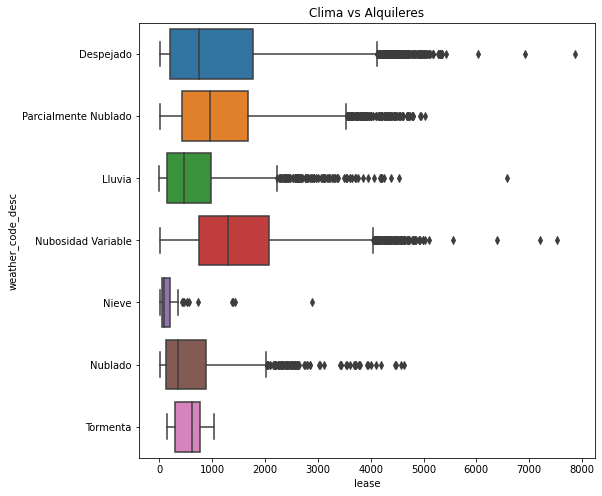

In [40]:
plt.figure(figsize=(18,8))
plt.subplot(121)
ax = sns.boxplot(y="weather_code_desc", x="lease", data=nybq1)
plt.title("Clima vs Alquileres");

En este gráfico se puede ver que las medianas de cada tipo de clima se mantienen en un rango no muy disperso. Salvo Tormenta, todos los demás climas tienen outlayers, que como ya se indicó, son válidos, por las características de los datos y cómo son recolectados.

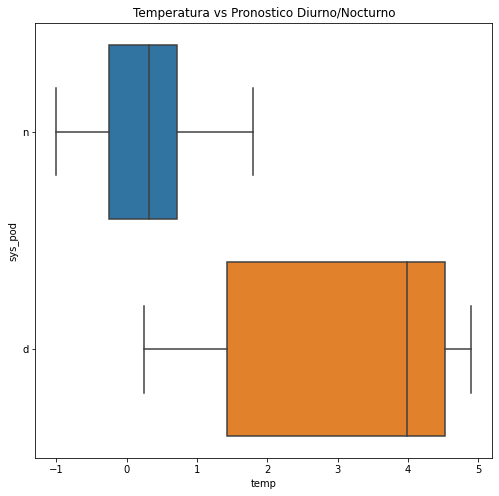

In [41]:
plt.figure(figsize=(18,8))
plt.subplot(121)
aax = sns.boxplot(y="sys_pod", x="temp", data=df6)
plt.title("Temperatura vs Pronostico Diurno/Nocturno");

Del grafico podemos ver que la mediana de temperatura del día ronda los 4°, mientras que durante la noche supera apenas los 0°. La amplitud térmica durante el día y la noche es bastante similar, rondando los +/- 3°.

In [42]:
df_prueba=nybq1[['lease','weather_code_desc']]
clima_test = df_prueba.groupby('weather_code_desc').agg('count')
clima_test=clima_test.rename(columns={'lease': 'Cantidad'})
clima_test

Cantidad
weather_code_desc             
Despejado                 6151
Lluvia                    2141
Nieve                       60
Nublado                   1464
Nubosidad Variable        4033
Parcialmente Nublado      3551
Tormenta                    14

<ipython-input-43-a7c2aae86fd4>:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  fig=plt.pie(x=clima_test, autopct="%.1f%%",labels=labels, pctdistance=0.5)


Text(0.5, 1.0, 'Distribucion de Alquileres por tipo de Clima')

<Figure size 1296x576 with 0 Axes>

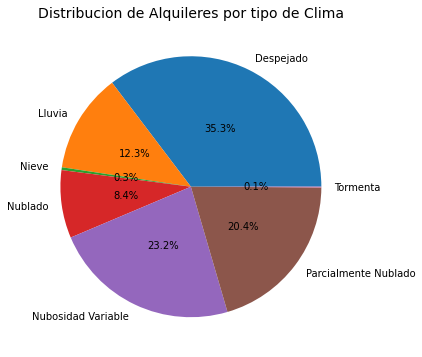

In [43]:
plt.figure(figsize=(18,8))
#plt.subplot(121)
labels = clima_test.index
pie, ax = plt.subplots(figsize=[10,6])
fig=plt.pie(x=clima_test, autopct="%.1f%%",labels=labels, pctdistance=0.5)
plt.title("Distribucion de Alquileres por tipo de Clima", fontsize=14)

Se puede apreciar que cuando está Nublado o hay Nieve o Tormenta, los aquileres son particularmente escasos con respecto al resto de los climas.

In [44]:
nybq31 = nybq1.copy()
nybq31['hour']=pd.to_datetime(nybq31['hour'])
nybq31['hora'] = nybq31['hour'].dt.hour

In [45]:
nybq3x = pd.DataFrame({'count': nybq31.groupby(['season_type_desc', 'hora', 'lease']).size()})
nybq3x = nybq3x.reset_index()
nybq3x

season_type_desc  hora  lease  count
0             Invierno     0     18      1
1             Invierno     0     25      1
2             Invierno     0     30      1
3             Invierno     0     36      1
4             Invierno     0     37      1
...                ...   ...    ...    ...
16585           Verano    23   4818      1
16586           Verano    23   4926      1
16587           Verano    23   5112      1
16588           Verano    23   5304      1
16589           Verano    23   5560      1

[16590 rows x 4 columns]

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


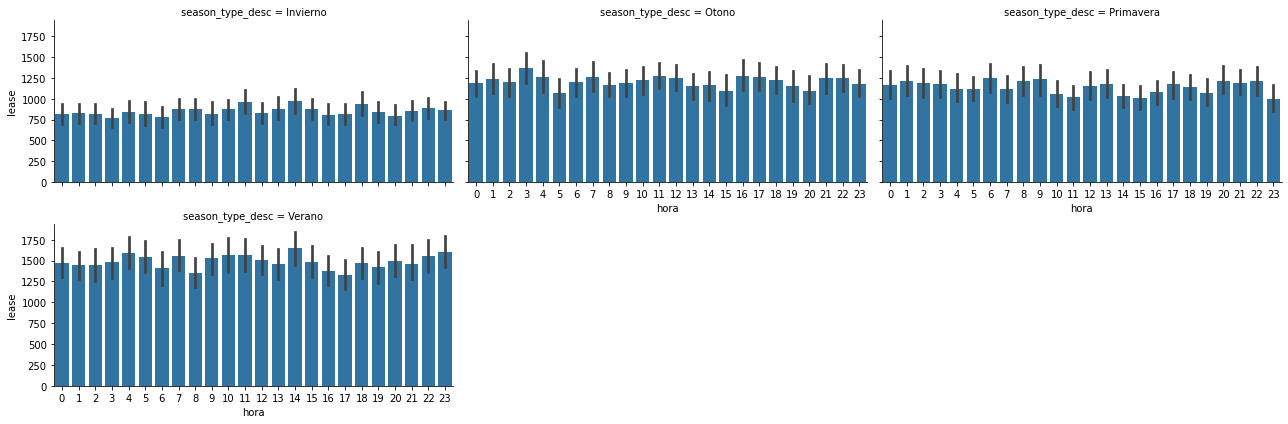

In [46]:
chart = sns.FacetGrid(nybq3x, col='season_type_desc', margin_titles=True, col_wrap=3, aspect=2, row_order=nybq3x['season_type_desc'].unique)
chart.map(sns.barplot, 'hora', 'lease',)

En este facegrid podemos visualizar que, a través de las horas de cada una de las estaciones, exite un patron de alquiler en el que se pueden observar subidas y bajadas cada aproximadamente 2 horas. Sin embargo, sí se evidnecia una diferencia marcada en los topes de alquileres entre Invierno y Verano por ejemplo.

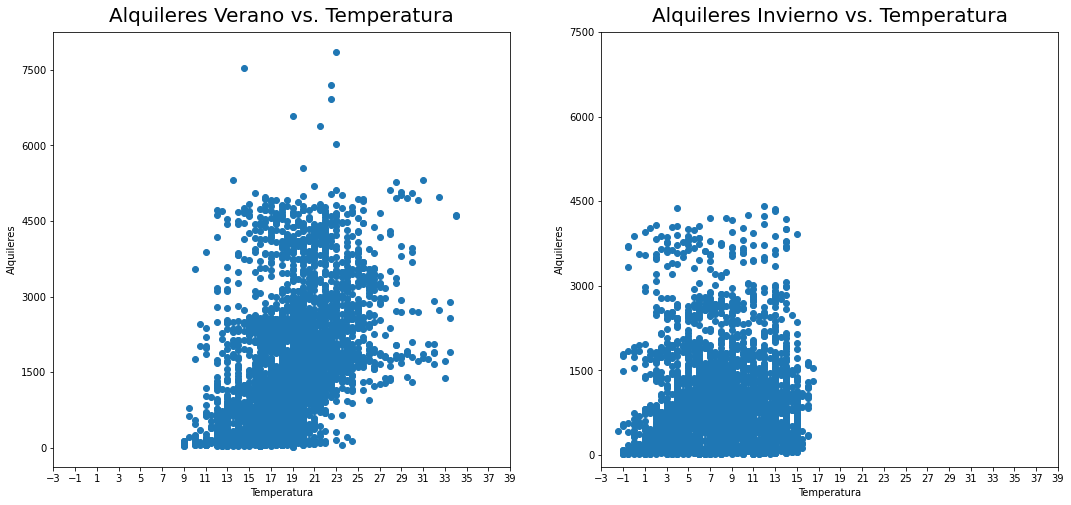

In [47]:
verano = nybq1.query("season_type_desc == 'Verano'")
invierno = nybq1.query("season_type_desc == 'Invierno'")
plt.figure(figsize=(18,8))
plt.subplot(121)
plt.scatter(x="t1",y="lease", data=verano)
plt.title("Alquileres Verano vs. Temperatura", fontsize=20, verticalalignment='bottom');
plt.xticks(range(-3, 40, 2))
plt.yticks(range(0, 8500, 1500))
plt.ylabel("Alquileres");
plt.xlabel("Temperatura");
plt.subplot(122)
plt.scatter(x="t1",y="lease", data=invierno)
plt.title("Alquileres Invierno vs. Temperatura", fontsize=20, verticalalignment='bottom');
plt.xticks(range(-3, 40, 2))
plt.yticks(range(0, 8500, 1500))
plt.ylabel("Alquileres");
plt.xlabel("Temperatura");

En estos graficos de dispersion se puede observar que durante el invierno, donde las temperaturas oscilan entre los -1° a los 15°, la concentracion de cantidad de alquileres es menor. Si bien hay momentos donde puede haber hasta casi 4500 en una hora, en su mayoria esta concentrados entre 0 y 1500.

Durante el verano en cambio presenta una concentracion más pareja hacia arriba, teniendo picos de mas 7500 rentas en una hora. Cuando las temperaturas son más agradables, es decir, entre 15° y 25°, es cuando se dan estos picos.

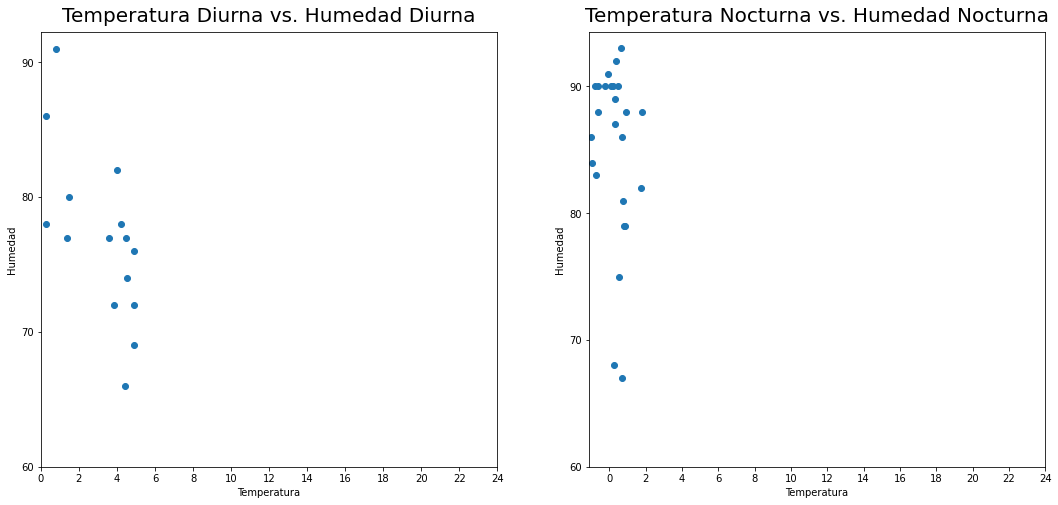

In [48]:
dia = df6.query("sys_pod == 'd'")
noche = df6.query("sys_pod == 'n'")
plt.figure(figsize=(18,8))
plt.subplot(121)
plt.scatter(x="temp",y="humidity", data=dia)
plt.title("Temperatura Diurna vs. Humedad Diurna", fontsize=20, verticalalignment='bottom');
plt.xticks(range(0, 25, 2))
plt.yticks(range(60, 100, 10))
plt.ylabel("Humedad");
plt.xlabel("Temperatura");
plt.subplot(122)
plt.scatter(x="temp",y="humidity", data=noche)
plt.title("Temperatura Nocturna vs. Humedad Nocturna", fontsize=20, verticalalignment='bottom');
plt.xticks(range(0, 25, 2))
plt.yticks(range(60, 100, 10))
plt.ylabel("Humedad");
plt.xlabel("Temperatura");

Durante el día, a mayor temperatura tiende a bajar el porcentaje de humedad. Durante la noche no hay una tendencia observable.

<ipython-input-49-136798b3b18c>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(121)


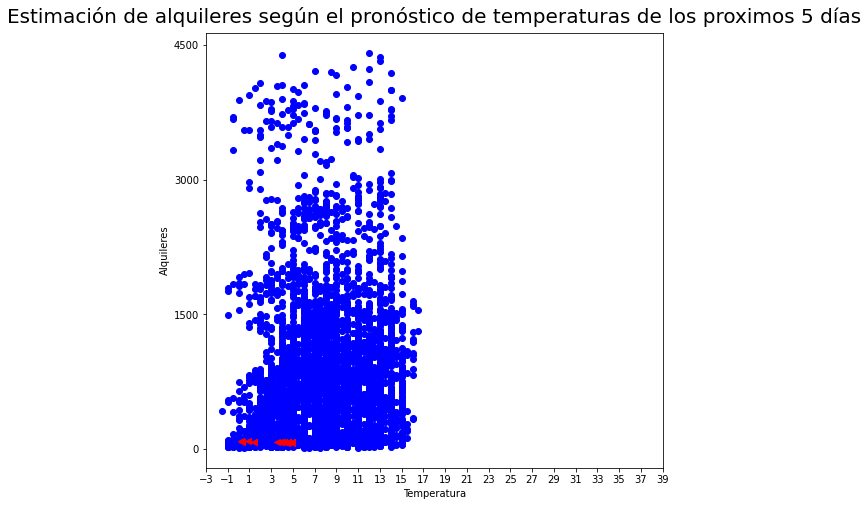

In [49]:
invierno = nybq1.query("season_type_desc == 'Invierno'")
dia = df6.query("sys_pod == 'd'")
plt.figure(figsize=(18,8))
plt.subplot(121)
plt.scatter(y="lease",x="t1", data=invierno, color='b')
plt.title("Alquileres Otoño vs. Temperatura", fontsize=20, verticalalignment='bottom');
plt.xticks(range(-3, 40, 2))
plt.yticks(range(0, 8500, 1500))
plt.ylabel("Alquileres");
plt.xlabel("Temperatura");
plt.subplot(121)
plt.scatter(y="humidity",x="temp", data=dia, marker='<', color='r')
plt.title("Estimación de alquileres según el pronóstico de temperaturas de los proximos 5 días", fontsize=20, verticalalignment='bottom');
plt.xticks(range(-3, 40, 2))
plt.xlabel("Temperatura");

De esta visualizacion podríamos estimar la cantidad de alquileres según el pronostico de las temperaturas de los proximos 5 días. Los triangulos rojos son las temperaturas esperadas para los proximos días, por lo que se podrían esperar picos de hasta 4500 alquileres por hora con concentraciones hasta los 1500.

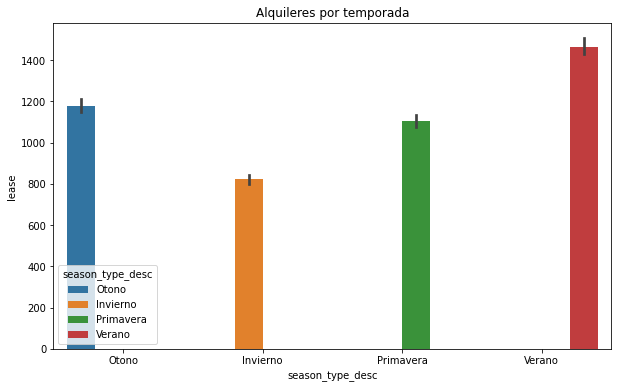

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(y='lease',x='season_type_desc', hue='season_type_desc',data=nybq1)
plt.title("Alquileres por temporada");

En este gráfico se puede apreciar que verano es la temporada con mas arriendos e invierno con la menor cantidad. las temporadas intermedias hacen de puente creciente entre ellas.

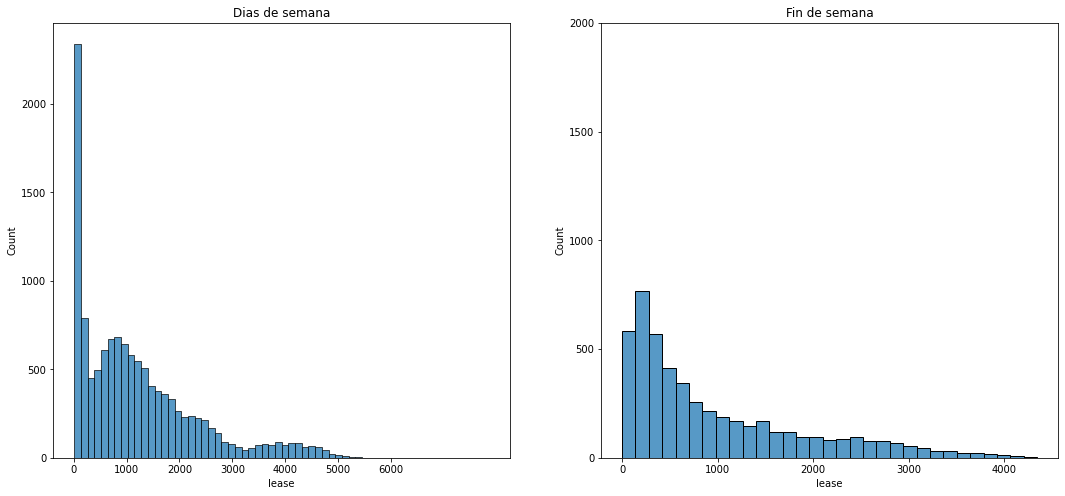

In [51]:
dia_semana = nybq1.query("is_weekend_desc == 'DdS'")
fin_semana = nybq1.query("is_weekend_desc == 'FdS'")
plt.figure(figsize=(18,8))
plt.subplot(121)
sns.histplot(data=dia_semana, x="lease")
plt.xticks(range(0, 7000, 1000))
plt.yticks(range(0, 2500, 500))
plt.title("Dias de semana");
plt.subplot(122)
sns.histplot(data=fin_semana, x="lease")
plt.xticks(range(0, 5000, 1000))
plt.yticks(range(0, 2500, 500))
plt.title("Fin de semana");

In [52]:
nybq1.pivot_table('lease','is_weekend_desc',aggfunc='mean')

lease
is_weekend_desc             
DdS              1209.274831
FdS               977.415694

In [53]:
nybq1.pivot_table('lease','is_weekend_desc',aggfunc='max')

lease
is_weekend_desc       
DdS               7860
FdS               4341

En promedio, los dias de semana hay hasta 1209 arriendos por hora, mientras
que los fines de semana desciende a 977.
El pico de alquileres en la semana alcanza los 7860. Los sabados y domingos el maximo es de 4341 en una hora.
De la distribucion podemos comentar que los alquileres por hora tanto en los fines de semana como entre semana, presentan una asimetria positiva. En dias de semana presentan una anomalia en los primeros dos intervalos, ya que los dos primeros tocan el pico de alquileres, y luego se vuelve a observar la asimetria positiva


##Validación de Hipótesis 🧪

###Hipótesis 1️⃣

In [54]:
nybq1.groupby(['season_type_desc'])['lease'].mean()

season_type_desc
Invierno      821.729099
Otono        1178.954218
Primavera    1103.831589
Verano       1464.465238
Name: lease, dtype: float64

In [55]:
Verano=nybq1[nybq1.season_type== 1].lease
Invierno=nybq1[nybq1.season_type== 3].lease
statistic, pvalue = stats.ttest_ind(Verano,Invierno, equal_var=False)
print('Estadistico:',round(statistic,2),'p-valor:', round(pvalue,5))

Estadistico: 28.54 p-valor: 0.0


**Conclusión:** podemos concluir que el promedio de la cantidad de alquileres de viaje de las cuatro estaciones definitivamente no es igual. Se hace evidente entonces que el promedio de cantidad de alquileres de viaje de los usos en Verano son significativamente mayor que el promedio de la cantidad de alquileres de viaje de los usos en invierno.

###Hipótesis 2️⃣

In [56]:
nybq1.groupby(['is_weekend'])['lease'].mean()

is_weekend
0    1209.274831
1     977.415694
Name: lease, dtype: float64

In [57]:
Fds_lease=nybq1[nybq1.is_weekend_desc=='FdS'].lease
DdS_lease=nybq1[nybq1.is_weekend_desc=='DdS'].lease

statistic, pvalue = stats.ttest_ind(Fds_lease,DdS_lease, equal_var=False)
print('Estadistico:',round(statistic,2),'p-valor:', round(pvalue,5))

Estadistico: -13.96 p-valor: 0.0



**Conclusión:** podemos concluir que el el promedio de la cantidad de alquileres de viaje de en fin de semana no esigual a que si no es fin de semana. Por lo tanto se hace evidente que el promedio de la cantidad de alquileres de viaje de Lunes a Viernes es significativamente mayor que el promedio de la cantidad de alquileres de viaje de en fin de semana.

###Feature Selection: Forward Selection

In [58]:
df1fs = nybq1.drop(['weather_code_desc', 'dateh', 'hour','is_holiday_desc','is_weekend_desc','season_type_desc'], axis=1)
df1fs.head()

lease    t1    t2   hum  wind_speed  weather_code  is_holiday  is_weekend  \
0    641   9.0   7.0  80.0        47.5             1           0           1   
1    644  15.0  15.0  59.0        56.5             3           0           0   
2    556   9.0   4.0  71.0        56.0             7           0           0   
3     65   5.0  -2.0  87.0        54.0             7           1           0   
4     47   9.0   4.0  73.5        52.0             7           1           0   

   season_type  
0            2  
1            2  
2            3  
3            0  
4            0

In [59]:
dffs = pd.DataFrame(df1fs)
dffs['lease'] = pd.Series(dffs.lease)
X = dffs.drop("lease", 1)       # feature matrix
y = dffs['lease']               # target feature
dffs.head()

<ipython-input-59-61e8348a3452>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = dffs.drop("lease", 1)       # feature matrix


lease    t1    t2   hum  wind_speed  weather_code  is_holiday  is_weekend  \
0    641   9.0   7.0  80.0        47.5             1           0           1   
1    644  15.0  15.0  59.0        56.5             3           0           0   
2    556   9.0   4.0  71.0        56.0             7           0           0   
3     65   5.0  -2.0  87.0        54.0             7           1           0   
4     47   9.0   4.0  73.5        52.0             7           1           0   

   season_type  
0            2  
1            2  
2            3  
3            0  
4            0

In [61]:
X.head()

t1    t2   hum  wind_speed  weather_code  is_holiday  is_weekend  \
0   9.0   7.0  80.0        47.5             1           0           1   
1  15.0  15.0  59.0        56.5             3           0           0   
2   9.0   4.0  71.0        56.0             7           0           0   
3   5.0  -2.0  87.0        54.0             7           1           0   
4   9.0   4.0  73.5        52.0             7           1           0   

   season_type  
0            2  
1            2  
2            3  
3            0  
4            0

In [63]:
y

0         641
1         644
2         556
3          65
4          47
         ... 
17409     833
17410      33
17411     110
17412    3887
17413      25
Name: lease, Length: 17414, dtype: int64

In [64]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [65]:
forward_selection(X,y)

<ipython-input-64-a6ce63c591b0>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-64-a6ce63c591b0>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-64-a6ce63c591b0>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-64-a6ce63c591b0>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


['hum',
 't1',
 'is_weekend',
 'season_type',
 'is_holiday',
 'wind_speed',
 'weather_code']

Aqui pordemos obener el listado de mejores features. Que se utilizaran en el siguiente punto de conclusiones.

##Conclusiones Técnicas 💯

In [66]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [67]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=7,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [68]:
sfs.fit(X, y)
sfs.k_feature_names_     #Lista final de features

('t1',
 'hum',
 'wind_speed',
 'weather_code',
 'is_holiday',
 'is_weekend',
 'season_type')

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)
# PRedecir con X_test
y_pred = lr.predict(X_test)

In [70]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 696.8472541046413


In [71]:
nybq1.lease.max()


7860

In [72]:
nybq1.lease.min()

0

**Este modelo tiene un error promedio de 696 alquileres de bicis. El rango de cantidad de alquileres va entre 0 y 7860**

In [73]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 906411.6654476894


In [74]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 952.056545299537


**El modelo tiene un error en promedio de +/- 952 alquileres de bicis.**

In [75]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE 6.858624429350517


In [76]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.25555782028241036


**Dado que R2 es cercano a 0 podemos concluir que el modelo propuesto no mejora la predicción sobre el modelo medido.**

##Recomendaciones con base en insights observados ✅

De los insights recopilados y analizados se pueden desprender las siguientes conclusiones y recomendaciones:


*   Las campañas de mercadeo deben ser orientadas por factores que impliquen la temporada. Intensificando,manteniendo o aumentando los esfuerzos en Verano e imprimiendo más campaña en Invierno y temporadas intermedias.
*   Se recomienda mantener las campañas de mercadeo a usuarios durante los días de semana, e intensificar y promover el uso durante los fines de semana.







##Técnicas de Machine Learning 🤖

###Parte 1️⃣ Ingenieria de Factores - MVP - Random Forest

####Ingenieria de Factores

#####Descripcion y Borrado

In [113]:
nybq1ML = pd.read_csv('london_merged.csv',sep=';', parse_dates=['dateh'])

In [114]:
nybq1ML.isnull().sum()

dateh                0
hour                 0
lease                0
t1                   0
t2                   0
hum                  0
wind_speed           0
weather_code         0
weather_code_desc    0
is_holiday           0
is_holiday_desc      0
is_weekend           0
is_weekend_desc      0
season_type          0
season_type_desc     0
dtype: int64

Podemos observar que en el dataset no hay valores nulos, por lo que no es necesario hacer algun tratamiento especial con ellos

Variables que se podrían remover son:

*   weather_code
*   is_holiday
*   is_weekend
*   season_type

Dado que son variables numéricas que se agregaron para ordenar las variables categóricas, se eliminarán para poder realizar el _Encoding_ de dichas variables.

In [115]:
# Se eliminan las columnas para poder realizar el Encoding
nybq1ML=nybq1ML.drop(columns=['weather_code','is_holiday','is_weekend','season_type'])
nybq1ML.columns

Index(['dateh', 'hour', 'lease', 't1', 't2', 'hum', 'wind_speed',
       'weather_code_desc', 'is_holiday_desc', 'is_weekend_desc',
       'season_type_desc'],
      dtype='object')

In [116]:
nybq1ML.shape

(17414, 11)

In [117]:
nybq1ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dateh              17414 non-null  datetime64[ns]
 1   hour               17414 non-null  object        
 2   lease              17414 non-null  int64         
 3   t1                 17414 non-null  float64       
 4   t2                 17414 non-null  float64       
 5   hum                17414 non-null  float64       
 6   wind_speed         17414 non-null  float64       
 7   weather_code_desc  17414 non-null  object        
 8   is_holiday_desc    17414 non-null  object        
 9   is_weekend_desc    17414 non-null  object        
 10  season_type_desc   17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 1.5+ MB


#####Feature Creation

In [119]:
nybq1ML['Day']=nybq1ML['dateh'].dt.day
nybq1ML['Month']=nybq1ML['dateh'].dt.month
nybq1ML['Year']=nybq1ML['dateh'].dt.year 
nybq1ML= nybq1ML.drop(columns=['dateh'])
nybq1ML.head()

hour  lease    t1    t2   hum  wind_speed     weather_code_desc  \
0  1:00:00    641   9.0   7.0  80.0        47.5             Despejado   
1  2:00:00    644  15.0  15.0  59.0        56.5  Parcialmente Nublado   
2  3:00:00    556   9.0   4.0  71.0        56.0                Lluvia   
3  4:00:00     65   5.0  -2.0  87.0        54.0                Lluvia   
4  5:00:00     47   9.0   4.0  73.5        52.0                Lluvia   

  is_holiday_desc is_weekend_desc season_type_desc  Day  Month  Year  
0      No Feriado             FdS            Otono   25     10  2015  
1      No Feriado             DdS            Otono   17     11  2015  
2      No Feriado             DdS         Invierno    2      8  2016  
3         Feriado             DdS        Primavera   28      3  2016  
4         Feriado             DdS        Primavera   28      3  2016

A continuacion realizamos un value count de las variables 'weather_code_desc','is_holiday_desc', 'is_weekend_desc', y de 'season_type_desc' para ver aquellos valores que tengan mayor cantidad de repeticiones, y entender si podemos simplificarlos.

In [120]:
nybq1ML['weather_code_desc'].value_counts() # Label Encoding Dejando un Top 3. Enviando a Lluvia Nublado, Nieve y Tormenta a "Otros"

Despejado               6151
Nubosidad Variable      4033
Parcialmente Nublado    3551
Lluvia                  2141
Nublado                 1464
Nieve                     60
Tormenta                  14
Name: weather_code_desc, dtype: int64

Del analisis realizado sobre 'weather_code_desc', podemos ver que los valores "Nublado", "Nieve" y "Tormenta" son los que menos repeticiones tienen, por lo que se determina aglomerarlos todos en una nueva categoria denominada "Otros"

In [121]:
nybq1ML['is_holiday_desc'].value_counts() # One Hot Encoding 

No Feriado    17030
Feriado         384
Name: is_holiday_desc, dtype: int64

In [122]:
nybq1ML['is_weekend_desc'].value_counts() # One Hot Encoding 

DdS    12444
FdS     4970
Name: is_weekend_desc, dtype: int64

In [123]:
nybq1['season_type_desc'].value_counts() # One Hot Encoding

Primavera    4394
Verano       4387
Invierno     4330
Otono        4303
Name: season_type_desc, dtype: int64

In [124]:
nybq1ML['hour'].value_counts() # Label Encoder

1:00:00     726
9:00:00     726
14:00:00    726
2:00:00     726
12:00:00    726
11:00:00    726
10:00:00    726
13:00:00    726
8:00:00     726
7:00:00     726
6:00:00     726
5:00:00     726
4:00:00     726
3:00:00     726
15:00:00    725
16:00:00    725
17:00:00    725
18:00:00    725
19:00:00    725
20:00:00    725
21:00:00    725
22:00:00    725
23:00:00    725
0:00:00     725
Name: hour, dtype: int64

#####Feature Cleaning - OneHot Encoder

In [125]:
from sklearn.preprocessing import OneHotEncoder
OHE=['is_holiday_desc','is_weekend_desc','season_type_desc']
#ohe= OneHotEncoder()
#ohe.fit_transform()
nybq1_OHE=pd.get_dummies(nybq1ML[OHE], columns = OHE)
nybq1ML=nybq1ML.drop(columns=['is_holiday_desc','is_weekend_desc','season_type_desc'])
nybq1_OHE.head()

is_holiday_desc_Feriado  is_holiday_desc_No Feriado  is_weekend_desc_DdS  \
0                        0                           1                    0   
1                        0                           1                    1   
2                        0                           1                    1   
3                        1                           0                    1   
4                        1                           0                    1   

   is_weekend_desc_FdS  season_type_desc_Invierno  season_type_desc_Otono  \
0                    1                          0                       1   
1                    0                          0                       1   
2                    0                          1                       0   
3                    0                          0                       0   
4                    0                          0                       0   

   season_type_desc_Primavera  season_type_desc_Verano  
0                           0                        0  
1                           0                        0  
2                           0                        0  
3                           1                        0  
4                           1                        0

Se crean codificaciones y un nuevo dataframe, con indice y categorizacion de las variables

In [126]:
nybq1_OHE.shape

(17414, 8)

#####Feature Transformation

In [127]:
nybq1ML['weather_code_desc'].value_counts()[0:3].index

Index(['Despejado', 'Nubosidad Variable', 'Parcialmente Nublado'], dtype='object')

In [128]:
# Reconvertir categorias para hacerlas reducidas y disminuir ruido
nybq1ML['weather_code_desc']=[x if x in nybq1ML['weather_code_desc'].value_counts()[0:3].index else 'Otro' for x in nybq1ML['weather_code_desc']]

En este apartado ejecutamos el resultado del Hot Encoding de la variable 'weather_code_desc' para agrupar lo que esta por debajo del Top 3 en una categoria "Otros"

In [129]:
nybq1ML['weather_code_desc'].value_counts()

Despejado               6151
Nubosidad Variable      4033
Otro                    3679
Parcialmente Nublado    3551
Name: weather_code_desc, dtype: int64

Verificamos que haya funcionado correctamente el Hot encoding. Como se ve, los valores que mas repeticiones tienen los sigue mostrando con su correcto label, y el resto lo agrupo en Otros.

#####Label Encoder

In [130]:
from sklearn.preprocessing import LabelEncoder
OHE1=['hour','weather_code_desc']
ohe1= LabelEncoder()
nybq1ML[OHE1]=nybq1ML[OHE1].apply(ohe1.fit_transform)
nybq1ML.head()

hour  lease    t1    t2   hum  wind_speed  weather_code_desc  Day  Month  \
0    11    641   9.0   7.0  80.0        47.5                  0   25     10   
1    16    644  15.0  15.0  59.0        56.5                  3   17     11   
2    17    556   9.0   4.0  71.0        56.0                  2    2      8   
3    18     65   5.0  -2.0  87.0        54.0                  2   28      3   
4    19     47   9.0   4.0  73.5        52.0                  2   28      3   

   Year  
0  2015  
1  2015  
2  2016  
3  2016  
4  2016

Formateamos los valores de la columna de horas para que lo muestre con numeros enteros, y no en formato de hora.

In [131]:
# Concatenar las columnas
nybq1_final= pd.concat([nybq1_OHE, nybq1ML],axis=1)
nybq1_final.head()

is_holiday_desc_Feriado  is_holiday_desc_No Feriado  is_weekend_desc_DdS  \
0                        0                           1                    0   
1                        0                           1                    1   
2                        0                           1                    1   
3                        1                           0                    1   
4                        1                           0                    1   

   is_weekend_desc_FdS  season_type_desc_Invierno  season_type_desc_Otono  \
0                    1                          0                       1   
1                    0                          0                       1   
2                    0                          1                       0   
3                    0                          0                       0   
4                    0                          0                       0   

   season_type_desc_Primavera  season_type_desc_Verano  hour  lease    t1  \
0                           0                        0    11    641   9.0   
1                           0                        0    16    644  15.0   
2                           0                        0    17    556   9.0   
3                           1                        0    18     65   5.0   
4                           1                        0    19     47   9.0   

     t2   hum  wind_speed  weather_code_desc  Day  Month  Year  
0   7.0  80.0        47.5                  0   25     10  2015  
1  15.0  59.0        56.5                  3   17     11  2015  
2   4.0  71.0        56.0                  2    2      8  2016  
3  -2.0  87.0        54.0                  2   28      3  2016  
4   4.0  73.5        52.0                  2   28      3  2016

Aqui se concatenan todas las columnas, para formar un solo dataframe.

In [133]:
nybq1_final.shape

(17414, 18)

#####Outliers

En este segmento vamos a realizar un tratamiento sobre los outliers

(array([8.274e+03, 4.416e+03, 2.355e+03, 1.241e+03, 5.610e+02, 4.710e+02,
        8.800e+01, 2.000e+00, 3.000e+00, 3.000e+00]),
 array([   0.,  786., 1572., 2358., 3144., 3930., 4716., 5502., 6288.,
        7074., 7860.]),
 <a list of 10 Patch objects>)

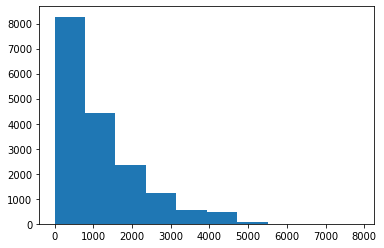

In [134]:
import matplotlib.pyplot as plt 
plt.hist(nybq1_final['lease'])

En este apartado eliminamos casi unos 800 outliers.

In [135]:
import numpy as np
Q1 = np.percentile(nybq1_final['lease'], 25,interpolation = 'midpoint')
Q3 = np.percentile(nybq1_final['lease'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print("Shape anterior: ", nybq1_final.shape)
Q3
# Limite superior
upper = np.where(nybq1_final['lease'] >= (Q3+1.5*IQR))
# Limite inferior
lower = np.where(nybq1_final['lease'] <= (Q1-1.5*IQR))
''' Remover Outliers '''
nybq1_final.drop(upper[0], inplace = True)
nybq1_final.drop(lower[0], inplace = True)

print("Nuevo Shape: ", nybq1_final.shape)

Shape anterior:  (17414, 18)
Nuevo Shape:  (16739, 18)


A continuacion normalizamos los valores de la variable 'lease' para su mejor interpretacion 

In [136]:
# Ahora Standard Scaler
from sklearn.preprocessing import PowerTransformer
se= PowerTransformer(method='yeo-johnson')
col_num=['t1','t2','hum','wind_speed','lease']
nybq1_final[col_num]=se.fit_transform(nybq1_final[col_num])
nybq1_final.head()

is_holiday_desc_Feriado  is_holiday_desc_No Feriado  is_weekend_desc_DdS  \
0                        0                           1                    0   
1                        0                           1                    1   
2                        0                           1                    1   
3                        1                           0                    1   
4                        1                           0                    1   

   is_weekend_desc_FdS  season_type_desc_Invierno  season_type_desc_Otono  \
0                    1                          0                       1   
1                    0                          0                       1   
2                    0                          1                       0   
3                    0                          0                       0   
4                    0                          0                       0   

   season_type_desc_Primavera  season_type_desc_Verano  hour     lease  \
0                           0                        0    11 -0.097495   
1                           0                        0    16 -0.093388   
2                           0                        0    17 -0.219900   
3                           1                        0    18 -1.549415   
4                           1                        0    19 -1.684629   

         t1        t2       hum  wind_speed  weather_code_desc  Day  Month  \
0 -0.561147 -0.628683  0.463558    2.998106                  0   25     10   
1  0.523025  0.574672 -1.031267    3.612512                  3   17     11   
2 -0.561147 -1.107581 -0.237317    3.579760                  2    2      8   
3 -1.362540 -2.211945  1.071968    3.447223                  2   28      3   
4 -0.561147 -1.107581 -0.051757    3.312141                  2   28      3   

   Year  
0  2015  
1  2015  
2  2016  
3  2016  
4  2016

(array([   3.,  597., 2054., 1759., 1701., 2474., 2863., 2527., 1872.,
         889.]),
 array([-2.61162366, -2.15368187, -1.69574009, -1.2377983 , -0.77985652,
        -0.32191473,  0.13602706,  0.59396884,  1.05191063,  1.50985242,
         1.9677942 ]),
 <a list of 10 Patch objects>)

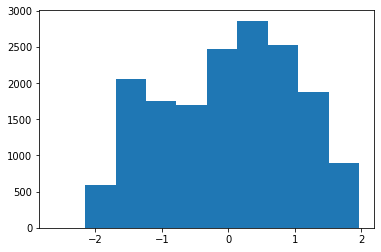

In [137]:
import matplotlib.pyplot as plt
plt.hist(nybq1_final['lease'])

####MVP (Minimun Value Product) Regresión

In [138]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [139]:
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

In [140]:
X, y = nybq1_final.drop(columns='lease'), nybq1_final['lease']
# Splitting
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size = 0.3, random_state = 123)
# Modelo base
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 100, seed = 42, max_depth=10, eta=0.01, 
                        subsample=0.7, colsample_bytree=0.8)
# Ajustar al modelo
xgb_r.fit(train_X, train_y)

XGBRegressor(colsample_bytree=0.8, eta=0.01, max_depth=10,
             objective='reg:squarederror', seed=42, subsample=0.7)

In [141]:
# Predecir
pred = xgb_r.predict(test_X)
# RMSE 
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

RMSE :  0.722031


Dado que el RMSE indica el ajuste absoluto del modelo a los datos, es decir, cuán cerca están los puntos de datos observados de los valores predichos del mismo, podemos decir que en promedio el error de nuestro modelos es de +/- 0,72 alquileres.

#####Feature Engineering

In [142]:
nybq1_final.head()

is_holiday_desc_Feriado  is_holiday_desc_No Feriado  is_weekend_desc_DdS  \
0                        0                           1                    0   
1                        0                           1                    1   
2                        0                           1                    1   
3                        1                           0                    1   
4                        1                           0                    1   

   is_weekend_desc_FdS  season_type_desc_Invierno  season_type_desc_Otono  \
0                    1                          0                       1   
1                    0                          0                       1   
2                    0                          1                       0   
3                    0                          0                       0   
4                    0                          0                       0   

   season_type_desc_Primavera  season_type_desc_Verano  hour     lease  \
0                           0                        0    11 -0.097495   
1                           0                        0    16 -0.093388   
2                           0                        0    17 -0.219900   
3                           1                        0    18 -1.549415   
4                           1                        0    19 -1.684629   

         t1        t2       hum  wind_speed  weather_code_desc  Day  Month  \
0 -0.561147 -0.628683  0.463558    2.998106                  0   25     10   
1  0.523025  0.574672 -1.031267    3.612512                  3   17     11   
2 -0.561147 -1.107581 -0.237317    3.579760                  2    2      8   
3 -1.362540 -2.211945  1.071968    3.447223                  2   28      3   
4 -0.561147 -1.107581 -0.051757    3.312141                  2   28      3   

   Year  
0  2015  
1  2015  
2  2016  
3  2016  
4  2016

A continuacion preparamos los datos para poder hacer un Mosaico con la variable 'weather_code_desc' y las horas de arriendo.

In [143]:
ts=pd.crosstab(nybq1_final.weather_code_desc, nybq1_final.hour)
ts.columns=['0:00','1:00','2:00','3:00','4:00','5:00','6:00','7:00','8:00','9:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00']
ts=ts.reset_index()
ts

weather_code_desc  0:00  1:00  2:00  3:00  4:00  5:00  6:00  7:00  8:00  \
0                  0   245   225   233   239   242   254   252   259   250   
1                  1   149   168   172   165   156   158   153   159   160   
2                  2   176   135   143   141   161   143   162   144   151   
3                  3   128   163   151   158   142   138   136   139   136   

   ...  14:00  15:00  16:00  17:00  18:00  19:00  20:00  21:00  22:00  23:00  
0  ...    241    248    237    223    262    256    258    236    257    223  
1  ...    149    173    156    171    144    169    145    161    158    156  
2  ...    157    134    154    154    160    142    144    162    141    161  
3  ...    140    139    151    145    124    139    147    138    150    152  

[4 rows x 25 columns]

In [144]:
ts1=pd.melt(ts,id_vars=['weather_code_desc'],value_vars=['0:00','1:00','2:00','3:00','4:00','5:00','6:00','7:00','8:00','9:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00'])
ts1

weather_code_desc variable  value
0                   0     0:00    245
1                   1     0:00    149
2                   2     0:00    176
3                   3     0:00    128
4                   0     1:00    225
..                ...      ...    ...
91                  3    22:00    150
92                  0    23:00    223
93                  1    23:00    156
94                  2    23:00    161
95                  3    23:00    152

[96 rows x 3 columns]

In [145]:
G = ts1.groupby(["weather_code_desc", "variable"]).sum()
G

value
weather_code_desc variable       
0                 0:00        245
                  10:00       222
                  11:00       228
                  12:00       245
                  13:00       237
...                           ...
3                 5:00        138
                  6:00        136
                  7:00        139
                  8:00        136
                  9:00        145

[96 rows x 1 columns]

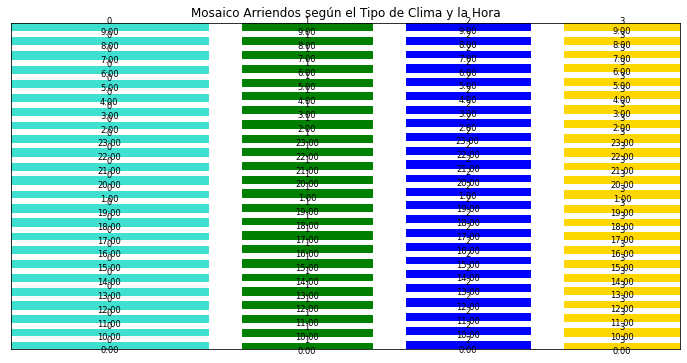

In [146]:
# Vamos a crear el mosaic plot
from statsmodels.graphics.mosaicplot import mosaic
fig, ax = plt.subplots(figsize=(12, 6))
props = lambda key: {'color': 'turquoise' if '0' in key else ('green' if '1' in key else ('blue' if '2' in key else 'gold'))}
#props = lambda key: {'color': 'turquoise' if '0'in key else ('green' if '1' in key else 'gold')}
mosaic(G["value"],gap=0.06,ax=ax, properties=props, axes_label=False, title='Mosaico Arriendos según el Tipo de Clima y la Hora')
plt.show()

Podemos ver que para el valor "despejado" (0), independientemente de las horas, siempre tiene mayor cantidad de alquileres cuando se presenta este tipo de clima.

In [147]:
nybq1_final.head()

is_holiday_desc_Feriado  is_holiday_desc_No Feriado  is_weekend_desc_DdS  \
0                        0                           1                    0   
1                        0                           1                    1   
2                        0                           1                    1   
3                        1                           0                    1   
4                        1                           0                    1   

   is_weekend_desc_FdS  season_type_desc_Invierno  season_type_desc_Otono  \
0                    1                          0                       1   
1                    0                          0                       1   
2                    0                          1                       0   
3                    0                          0                       0   
4                    0                          0                       0   

   season_type_desc_Primavera  season_type_desc_Verano  hour     lease  \
0                           0                        0    11 -0.097495   
1                           0                        0    16 -0.093388   
2                           0                        0    17 -0.219900   
3                           1                        0    18 -1.549415   
4                           1                        0    19 -1.684629   

         t1        t2       hum  wind_speed  weather_code_desc  Day  Month  \
0 -0.561147 -0.628683  0.463558    2.998106                  0   25     10   
1  0.523025  0.574672 -1.031267    3.612512                  3   17     11   
2 -0.561147 -1.107581 -0.237317    3.579760                  2    2      8   
3 -1.362540 -2.211945  1.071968    3.447223                  2   28      3   
4 -0.561147 -1.107581 -0.051757    3.312141                  2   28      3   

   Year  
0  2015  
1  2015  
2  2016  
3  2016  
4  2016

En este apartado compararemos la cantidad de arriendos en funcion del clima, pero por año.

In [148]:
tss=pd.crosstab(nybq1_final.weather_code_desc, nybq1_final.Year)
tss.columns=['2015','2016','2017']
tss=tss.reset_index()
tss

weather_code_desc  2015  2016  2017
0                  0  2868  2921    30
1                  1  1904  1915     7
2                  2  1811  1825    22
3                  3  1754  1669    13

In [149]:
ts11=pd.melt(tss,id_vars=['weather_code_desc'],value_vars=['2015','2016','2017'])
ts11

weather_code_desc variable  value
0                   0     2015   2868
1                   1     2015   1904
2                   2     2015   1811
3                   3     2015   1754
4                   0     2016   2921
5                   1     2016   1915
6                   2     2016   1825
7                   3     2016   1669
8                   0     2017     30
9                   1     2017      7
10                  2     2017     22
11                  3     2017     13

In [150]:
GG = ts11.groupby(["weather_code_desc", "variable"]).sum()
GG

value
weather_code_desc variable       
0                 2015       2868
                  2016       2921
                  2017         30
1                 2015       1904
                  2016       1915
                  2017          7
2                 2015       1811
                  2016       1825
                  2017         22
3                 2015       1754
                  2016       1669
                  2017         13

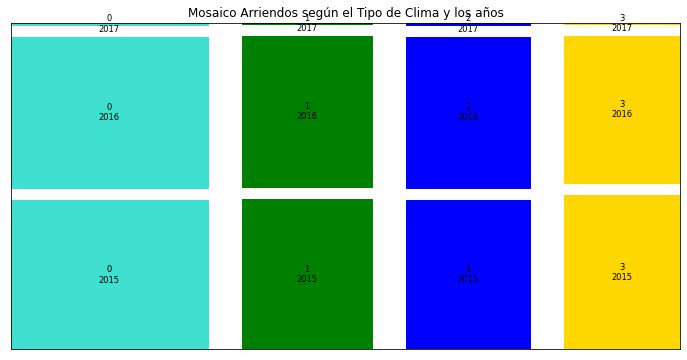

In [151]:
# Vamos a crear el mosaic plot
from statsmodels.graphics.mosaicplot import mosaic
fig, ax = plt.subplots(figsize=(12, 6))
props = lambda key: {'color': 'turquoise' if '0' in key else ('green' if '1' in key else ('blue' if '2' in key else 'gold'))}
#props = lambda key: {'color': 'turquoise' if '0'in key else ('green' if '1' in key else 'gold')}
mosaic(GG["value"],gap=0.06,ax=ax, properties=props, axes_label=False, title='Mosaico Arriendos según el Tipo de Clima y los años')
plt.show()

Al hacer el mismo analisis anterior, pero comparando el tipo de clima a lo largo de los años, tambien observamos que cuando esta "Despejado" el numero de arriendos es mayor al resto.

####Predicción con Random Forest

In [152]:
nybq1_final.head()

is_holiday_desc_Feriado  is_holiday_desc_No Feriado  is_weekend_desc_DdS  \
0                        0                           1                    0   
1                        0                           1                    1   
2                        0                           1                    1   
3                        1                           0                    1   
4                        1                           0                    1   

   is_weekend_desc_FdS  season_type_desc_Invierno  season_type_desc_Otono  \
0                    1                          0                       1   
1                    0                          0                       1   
2                    0                          1                       0   
3                    0                          0                       0   
4                    0                          0                       0   

   season_type_desc_Primavera  season_type_desc_Verano  hour     lease  \
0                           0                        0    11 -0.097495   
1                           0                        0    16 -0.093388   
2                           0                        0    17 -0.219900   
3                           1                        0    18 -1.549415   
4                           1                        0    19 -1.684629   

         t1        t2       hum  wind_speed  weather_code_desc  Day  Month  \
0 -0.561147 -0.628683  0.463558    2.998106                  0   25     10   
1  0.523025  0.574672 -1.031267    3.612512                  3   17     11   
2 -0.561147 -1.107581 -0.237317    3.579760                  2    2      8   
3 -1.362540 -2.211945  1.071968    3.447223                  2   28      3   
4 -0.561147 -1.107581 -0.051757    3.312141                  2   28      3   

   Year  
0  2015  
1  2015  
2  2016  
3  2016  
4  2016

In [153]:
from sklearn.model_selection import train_test_split
X=nybq1_final[['lease','t1','t2','hum','wind_speed','hour','is_holiday_desc_Feriado',	'is_holiday_desc_No Feriado',	'is_weekend_desc_DdS',	'is_weekend_desc_FdS',	'season_type_desc_Invierno',	'season_type_desc_Otono',	'season_type_desc_Primavera',	'season_type_desc_Verano']]
y= nybq1_final['weather_code_desc'].astype('str')

In [155]:
X.head()

lease        t1        t2       hum  wind_speed  hour  \
0 -0.097495 -0.561147 -0.628683  0.463558    2.998106    11   
1 -0.093388  0.523025  0.574672 -1.031267    3.612512    16   
2 -0.219900 -0.561147 -1.107581 -0.237317    3.579760    17   
3 -1.549415 -1.362540 -2.211945  1.071968    3.447223    18   
4 -1.684629 -0.561147 -1.107581 -0.051757    3.312141    19   

   is_holiday_desc_Feriado  is_holiday_desc_No Feriado  is_weekend_desc_DdS  \
0                        0                           1                    0   
1                        0                           1                    1   
2                        0                           1                    1   
3                        1                           0                    1   
4                        1                           0                    1   

   is_weekend_desc_FdS  season_type_desc_Invierno  season_type_desc_Otono  \
0                    1                          0                       1   
1                    0                          0                       1   
2                    0                          1                       0   
3                    0                          0                       0   
4                    0                          0                       0   

   season_type_desc_Primavera  season_type_desc_Verano  
0                           0                        0  
1                           0                        0  
2                           0                        0  
3                           1                        0  
4                           1                        0

In [156]:
y

0        0
1        3
2        2
3        2
4        2
        ..
17408    0
17409    0
17410    0
17411    0
17413    0
Name: weather_code_desc, Length: 16739, dtype: object

In [157]:
#Esto no se hace porque ya lo hicimos al establecer las variables dummies
#A=X[['Pclass','Age','SibSp','Parch','Fare']] # Numericas
#A= (A-A.mean())/A.std()
#B=pd.get_dummies(X[['Sex','Embarked','Title','FsizeD','Child','Mother']]) # Binarias
#X_new=pd.concat([A,B],axis=1)
#X_new.head()

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [159]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier

sklearn.ensemble._forest.RandomForestClassifier

In [160]:
clf = RandomForestClassifier(max_depth=18, random_state=42, n_estimators=160,criterion='gini')
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=18, n_estimators=160, random_state=42)

In [161]:
# Obtener predicciones
y_pred= clf.predict(X_test)

In [162]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.61      0.72      0.66      1931
           1       0.48      0.47      0.47      1240
           2       0.54      0.51      0.52      1214
           3       0.44      0.34      0.39      1139

    accuracy                           0.54      5524
   macro avg       0.52      0.51      0.51      5524
weighted avg       0.53      0.54      0.53      5524



En este modelo buscamos predecir con que tipo de clima la demanda sera mayor, y por los resultados obtenidos podemos decir con un 54% de accuracy, que cuando esta 'Despejado' (0) es cuando la demanda sera mas alta

In [163]:
from sklearn.metrics import confusion_matrix #1
confusion_matrix(y_test, y_pred) 

array([[1390,  283,  140,  118],
       [ 381,  578,  119,  162],
       [ 266,  122,  616,  210],
       [ 245,  232,  271,  391]])

In [164]:
clf.feature_importances_

array([0.20107673, 0.11057618, 0.11432611, 0.2012502 , 0.16519014,
       0.13271416, 0.00452449, 0.00444013, 0.01257782, 0.01280371,
       0.01008999, 0.01158414, 0.0106175 , 0.00822869])

In [165]:
len(clf.feature_importances_)

14

In [166]:
len(X_train.columns)

14

Text(0.5, 0, 'Random Forest Feature Importance')

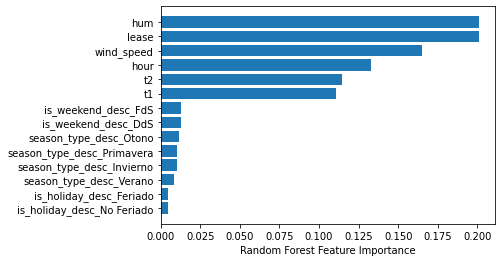

In [167]:
sorted_idx = clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

En este barplot podemos observar la importancia relativa de las variables de nuestro modelo sobre el valor a predecir (condicion climatica). Vemos que las de mayor peso son 'hum', 'lease' y 'wind_speed'

###Parte 2️⃣ Regresiones: Logistica - KMeans - KNN - Arbol y Matriz de Confusion

####KNN

In [168]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [169]:
y_testKNN=neigh.predict(X_test)
y_testKNN

array(['3', '1', '2', ..., '2', '0', '2'], dtype=object)

In [170]:
print(classification_report(y_pred=y_pred, y_true= y_testKNN))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74      2624
           1       0.59      0.58      0.59      1220
           2       0.59      0.68      0.63      1003
           3       0.36      0.47      0.41       677

    accuracy                           0.64      5524
   macro avg       0.58      0.61      0.59      5524
weighted avg       0.66      0.64      0.65      5524



####Regresión Logistica

In [171]:
from sklearn.linear_model import LogisticRegression

In [172]:
clfRL = LogisticRegression(random_state=42,max_iter=500,\
                         solver='newton-cg').fit(X_train, y_train)

In [173]:
y_testRL=clfRL.predict(X_test)
y_testRL

array(['2', '1', '2', ..., '2', '0', '2'], dtype=object)

In [174]:
print(classification_report(y_pred=y_pred, y_true= y_testRL))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74      2531
           1       0.51      0.63      0.56       987
           2       0.73      0.63      0.68      1341
           3       0.40      0.52      0.45       665

    accuracy                           0.65      5524
   macro avg       0.61      0.62      0.61      5524
weighted avg       0.67      0.65      0.66      5524



Al igual que el modelo anterior, volvemos a obtener que cuando el clima este 'Despejado' es cuando la demanda sera mayor, en este caso con un 65% de accuracy

En este modelo buscamos predecir con que tipo de clima la demanda sera mayor, y por los resultados obtenidos podemos decir con un 64% de accuracy, que cuando esta 'Despejado' (0) es cuando la demanda sera mas alta

####K-means

In [175]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)#, random_state=42) 
kmeans.fit(X)

KMeans(n_clusters=3)

**En principío se prueba realizar un clustering de 3 centroides.**

In [176]:
centroides = kmeans.cluster_centers_
etiquetas = kmeans.labels_
etiquetas

array([0, 1, 1, ..., 2, 2, 2], dtype=int32)

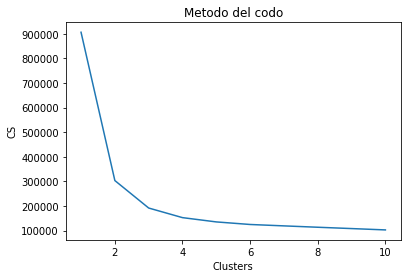

In [177]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('Metodo del codo')
plt.xlabel('Clusters')
plt.ylabel('CS')
plt.show()

In [178]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


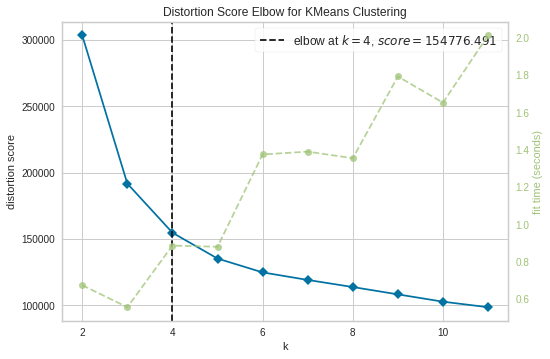

In [179]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(X)  
visualizer.show()

**Aplicamos el método del codo, y notamos que es posible mejorar el model de agrupamiento en 4 clústeres.**

In [180]:
kmeans2 = KMeans(n_clusters=4)#, random_state=42) 
kmeans2.fit(X)

KMeans(n_clusters=4)

In [181]:
labels = kmeans.labels_
labels

array([8, 9, 9, ..., 0, 0, 3], dtype=int32)

####Arbol de Decision modelo de Clasificación en Scikit-Learn y Matriz de Confusión

In [182]:
import numpy as np
#X1=nybq1_final[['lease','t1','t2','hum','wind_speed','hour','is_holiday_desc_Feriado',	'is_holiday_desc_No Feriado',	'is_weekend_desc_DdS',	'is_weekend_desc_FdS',	'season_type_desc_Invierno',	'season_type_desc_Otono',	'season_type_desc_Primavera',	'season_type_desc_Verano']]
X1=nybq1_final.drop("season_type_desc_Invierno", axis=1)
#y1= nybq1_final['weather_code_desc'].astype('str')
y1= nybq1_final.season_type_desc_Invierno

In [183]:
from sklearn.model_selection import train_test_split 
#Train y Test Split 1
X_trainAD, X_testAD, y_trainAD, y_testAD = train_test_split(X1, y1, test_size=0.30, random_state=42) 

In [184]:
#Arbol de Decision 2
from sklearn.tree import DecisionTreeClassifier 
arbol_de_decision = DecisionTreeClassifier(max_depth=4, random_state = 42) 

In [185]:
#Fit 3
arbol_de_decision.fit(X_trainAD,y_trainAD) #Entrenamos el modelo

DecisionTreeClassifier(max_depth=4, random_state=42)

In [186]:
#Prediccion 4
y_test_predAD = arbol_de_decision.predict(X_testAD)

In [187]:
#5
y_test_predAD

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [188]:
#6
y_testAD

15035    0
6297     0
5776     0
99       0
11542    1
        ..
1299     0
5094     0
4809     0
14490    0
9069     0
Name: season_type_desc_Invierno, Length: 5022, dtype: uint8

In [189]:
#Accurrancy score 8
from sklearn.metrics import accuracy_score
print('"Accuracy" del modelo de clasificación: ', accuracy_score(y_testAD,y_test_predAD))

"Accuracy" del modelo de clasificación:  0.9745121465551573


In [190]:
#matriz de confusión 9
from sklearn.metrics import confusion_matrix
CM =confusion_matrix(y_testAD, y_test_predAD) 
CM

array([[3732,    0],
       [ 128, 1162]])

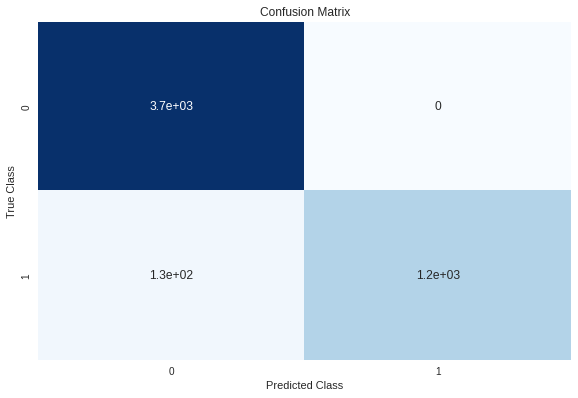

In [191]:
sns.heatmap(CM, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

En este caso tenemos:

*   **3732** “verdadero positivo” (TP): eventos predichos correctamente.
*   **128** "falso positivo" (FP): eventos pronosticados incorrectamente (Error Tipo I).
*   **1162** "verdadero negativo" (TN): sin eventos predichos correctamente.
*   **0** "falso negativo" (FN): sin eventos pronosticados incorrectamente (Error Tipo II)


Métrica Precision

In [192]:
from sklearn.metrics import precision_score
MP=precision_score(y_testAD, y_test_predAD) 
print('Precisión del rendimiento de un modelo de clasificación cuando se tienen dos clases con tamaño desigual, desde el punto de vista de los falsos positivos: ', MP)

Precisión del rendimiento de un modelo de clasificación cuando se tienen dos clases con tamaño desigual, desde el punto de vista de los falsos positivos:  1.0


Métrica Recall

In [193]:
from sklearn.metrics import recall_score
MR= recall_score(y_testAD, y_test_predAD) 
print('Precisión del rendimiento de un modelo de clasificación cuando se tienen dos clases con tamaño desigual, desde el punto de vista de los falsos negativos: ', MR)

Precisión del rendimiento de un modelo de clasificación cuando se tienen dos clases con tamaño desigual, desde el punto de vista de los falsos negativos:  0.9007751937984496


Métrica F1 score

In [194]:
from sklearn.metrics import f1_score
F1=f1_score(y_testAD, y_test_predAD) 
print('F1 Score del modelo de clasificación tomando en cuenta la precisión y el recall: ', F1)

F1 Score del modelo de clasificación tomando en cuenta la precisión y el recall:  0.9477977161500816


Classification Report

In [195]:
from sklearn.metrics import classification_report
print(classification_report(y_testAD,y_test_predAD))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3732
           1       1.00      0.90      0.95      1290

    accuracy                           0.97      5022
   macro avg       0.98      0.95      0.97      5022
weighted avg       0.98      0.97      0.97      5022



####Calculo y Ploteo de la Curva ROC

In [196]:
y_test_predAD

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [197]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_score1 = arbol_de_decision.predict_proba(X_testAD)[:,1]
y_score1

array([0.10303877, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ])

In [198]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_testAD, y_score1)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_testAD, y_score1))

roc_auc_score for DecisionTree:  0.9855230688701114


**Al tener un AUC cercano a 1 podemos concluir una performace casi perfecta en cuanto a la medición del rendimiento del modelo de clasificación en diferentes valores de umbral.**

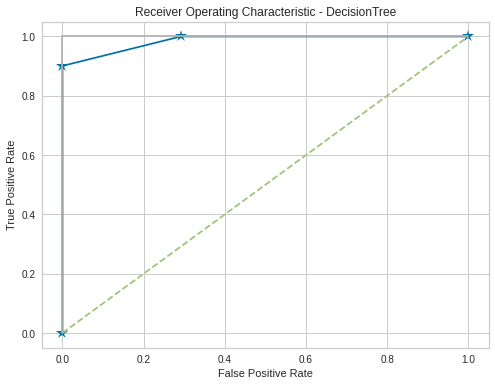

In [199]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1,marker='*', markersize=12)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###Parte 3️⃣ Principal Component Analysis (PCA)

####Carga de Datos

In [200]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [201]:
nybq3= pd.read_csv('london_merged.csv',sep=';', parse_dates=['dateh'])

In [202]:
nybq3.head()

dateh     hour  lease    t1    t2   hum  wind_speed  weather_code  \
0 2015-10-25  1:00:00    641   9.0   7.0  80.0        47.5             1   
1 2015-11-17  2:00:00    644  15.0  15.0  59.0        56.5             3   
2 2016-08-02  3:00:00    556   9.0   4.0  71.0        56.0             7   
3 2016-03-28  4:00:00     65   5.0  -2.0  87.0        54.0             7   
4 2016-03-28  5:00:00     47   9.0   4.0  73.5        52.0             7   

      weather_code_desc  is_holiday is_holiday_desc  is_weekend  \
0             Despejado           0      No Feriado           1   
1  Parcialmente Nublado           0      No Feriado           0   
2                Lluvia           0      No Feriado           0   
3                Lluvia           1         Feriado           0   
4                Lluvia           1         Feriado           0   

  is_weekend_desc  season_type season_type_desc  
0             FdS            2            Otono  
1             DdS            2            Otono  
2             DdS            3         Invierno  
3             DdS            0        Primavera  
4             DdS            0        Primavera

In [203]:
nybq3=nybq3.drop(columns=['weather_code_desc','is_holiday_desc','is_weekend_desc','season_type_desc'])
nybq3.head()

dateh     hour  lease    t1    t2   hum  wind_speed  weather_code  \
0 2015-10-25  1:00:00    641   9.0   7.0  80.0        47.5             1   
1 2015-11-17  2:00:00    644  15.0  15.0  59.0        56.5             3   
2 2016-08-02  3:00:00    556   9.0   4.0  71.0        56.0             7   
3 2016-03-28  4:00:00     65   5.0  -2.0  87.0        54.0             7   
4 2016-03-28  5:00:00     47   9.0   4.0  73.5        52.0             7   

   is_holiday  is_weekend  season_type  
0           0           1            2  
1           0           0            2  
2           0           0            3  
3           1           0            0  
4           1           0            0

In [204]:
nybq3['Day']=nybq3['dateh'].dt.day
nybq3['Month']=nybq3['dateh'].dt.month
nybq3['Year']=nybq3['dateh'].dt.year 
nybq3= nybq3.drop(columns=['dateh'])
nybq3.head()

hour  lease    t1    t2   hum  wind_speed  weather_code  is_holiday  \
0  1:00:00    641   9.0   7.0  80.0        47.5             1           0   
1  2:00:00    644  15.0  15.0  59.0        56.5             3           0   
2  3:00:00    556   9.0   4.0  71.0        56.0             7           0   
3  4:00:00     65   5.0  -2.0  87.0        54.0             7           1   
4  5:00:00     47   9.0   4.0  73.5        52.0             7           1   

   is_weekend  season_type  Day  Month  Year  
0           1            2   25     10  2015  
1           0            2   17     11  2015  
2           0            3    2      8  2016  
3           0            0   28      3  2016  
4           0            0   28      3  2016

In [205]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
nybq3.mean(axis=0)

----------------------
Media de cada variable
----------------------


lease           1143.101642
t1                12.468129
t2                11.520874
hum               72.324730
wind_speed        15.915318
weather_code       2.722694
is_holiday         0.022051
is_weekend         0.285403
season_type        1.492075
Day               15.741989
Month              6.524635
Year            2015.507810
dtype: float64

In [206]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
nybq3.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


lease           1.177460e+06
t1              3.104501e+01
t2              4.376007e+01
hum             2.048567e+02
wind_speed      6.237595e+01
weather_code    5.481186e+00
is_holiday      2.156621e-02
is_weekend      2.039596e-01
season_type     1.251962e+00
Day             7.753941e+01
Month           1.189404e+01
Year            2.582230e-01
dtype: float64

####Entrenamiento modelo PCA con escalado de los datos

In [207]:
nybq4=nybq3
nybq4['hour'] = pd.to_numeric(pd.to_datetime(nybq3['hour']))
nybq4.head(14)

hour  lease    t1    t2   hum  wind_speed  weather_code  \
0   1674090000000000000    641   9.0   7.0  80.0        47.5             1   
1   1674093600000000000    644  15.0  15.0  59.0        56.5             3   
2   1674097200000000000    556   9.0   4.0  71.0        56.0             7   
3   1674100800000000000     65   5.0  -2.0  87.0        54.0             7   
4   1674104400000000000     47   9.0   4.0  73.5        52.0             7   
5   1674108000000000000    934  15.0  15.0  59.0        51.0             3   
6   1674111600000000000    964   9.0   4.0  66.0        51.0             3   
7   1674115200000000000    169   7.5   2.0  73.5        50.0             3   
8   1674118800000000000    612   9.5   5.0  64.5        49.5             7   
9   1674122400000000000    619  14.0  14.0  77.0        48.0             3   
10  1674126000000000000    894  13.0  13.0  39.5        48.0             1   
11  1674129600000000000    737  12.0  12.0  42.5        48.0             2   
12  1674133200000000000   1635  11.0  11.0  58.0        48.0             3   
13  1674136800000000000    963  12.0  12.0  44.0        47.5             1   

    is_holiday  is_weekend  season_type  Day  Month  Year  
0            0           1            2   25     10  2015  
1            0           0            2   17     11  2015  
2            0           0            3    2      8  2016  
3            1           0            0   28      3  2016  
4            1           0            0   28      3  2016  
5            0           0            2   17     11  2015  
6            0           0            3    2      8  2016  
7            1           0            0   28      3  2016  
8            0           0            3    2      8  2016  
9            0           1            3    1     10  2015  
10           0           0            0   31      3  2015  
11           0           0            0   31      3  2015  
12           0           0            0   31      3  2015  
13           0           0            0   31      3  2015

In [208]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(nybq4)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [209]:
pca_pipe # pasosa ejecutar

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [210]:
pca_pipe.fit(nybq4)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [211]:
nybq4.head()

hour  lease    t1    t2   hum  wind_speed  weather_code  \
0  1674090000000000000    641   9.0   7.0  80.0        47.5             1   
1  1674093600000000000    644  15.0  15.0  59.0        56.5             3   
2  1674097200000000000    556   9.0   4.0  71.0        56.0             7   
3  1674100800000000000     65   5.0  -2.0  87.0        54.0             7   
4  1674104400000000000     47   9.0   4.0  73.5        52.0             7   

   is_holiday  is_weekend  season_type  Day  Month  Year  
0           0           1            2   25     10  2015  
1           0           0            2   17     11  2015  
2           0           0            3    2      8  2016  
3           1           0            0   28      3  2016  
4           1           0            0   28      3  2016

In [212]:
print(modelo_pca.components_)

[[-5.68629580e-03  3.66298523e-01  5.32383910e-01  5.21423432e-01
  -4.24952118e-01  1.41709329e-01 -1.71392593e-01 -3.76346444e-02
  -3.09272189e-02 -2.53189273e-01  2.61724363e-02  1.03749453e-01
  -5.01015395e-02]
 [-3.55874490e-02 -1.63364865e-01  2.69579997e-01  3.04820657e-01
   3.89445829e-01 -2.05559737e-01  2.89188517e-01 -7.44128589e-02
   1.20040187e-01  2.64656857e-01  1.17022270e-01  6.51515394e-01
   2.73293975e-02]
 [-2.46161140e-02 -5.69175759e-02  3.45303540e-02  3.06485363e-05
  -4.95573856e-02  6.61349647e-01  5.18293886e-01 -1.87724933e-01
   2.68493969e-01  1.14868392e-01 -3.57294494e-03 -1.22318488e-01
  -3.88581085e-01]
 [-3.01721991e-02  4.28670567e-03  3.08243308e-02  2.75534306e-02
   3.88654053e-02  2.01400508e-01  2.25671954e-01  6.91444941e-01
  -5.54714661e-01  4.47727746e-02  3.33419254e-01  1.99890962e-02
  -7.06002196e-02]
 [ 5.90690668e-02 -3.12792074e-01  1.27025052e-01  1.41892895e-01
   1.10949691e-01 -1.90761563e-01  2.43387757e-01  2.55485810e-01


In [213]:
# Se convierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = nybq4.columns)

hour     lease        t1        t2       hum  wind_speed  \
0  -0.005686  0.366299  0.532384  0.521423 -0.424952    0.141709   
1  -0.035587 -0.163365  0.269580  0.304821  0.389446   -0.205560   
2  -0.024616 -0.056918  0.034530  0.000031 -0.049557    0.661350   
3  -0.030172  0.004287  0.030824  0.027553  0.038865    0.201401   
4   0.059069 -0.312792  0.127025  0.141893  0.110950   -0.190762   
5   0.364072  0.079580  0.079039  0.064120  0.077749    0.147023   
6  -0.894360 -0.037018  0.026629  0.026784  0.046440   -0.021077   
7  -0.239144  0.215998 -0.020166 -0.047885 -0.102950    0.224969   
8   0.063039 -0.071680 -0.048668 -0.061645 -0.136713    0.193890   
9   0.009846  0.630408  0.007535  0.022651  0.061141   -0.447480   
10  0.001750  0.429817 -0.320482 -0.324617 -0.049615    0.056138   
11 -0.001965 -0.310444 -0.069488 -0.089404 -0.779043   -0.329531   
12 -0.000747  0.003389 -0.712945  0.699646 -0.029544    0.032912   

    weather_code  is_holiday  is_weekend  season_type       Day     Month  \
0      -0.171393   -0.037635   -0.030927    -0.253189  0.026172  0.103749   
1       0.289189   -0.074413    0.120040     0.264657  0.117022  0.651515   
2       0.518294   -0.187725    0.268494     0.114868 -0.003573 -0.122318   
3       0.225672    0.691445   -0.554715     0.044773  0.333419  0.019989   
4       0.243388    0.255486    0.439090    -0.569324  0.248848 -0.299837   
5       0.346506    0.092686   -0.144522    -0.054137 -0.624904 -0.027478   
6       0.099635    0.095699   -0.044653    -0.143365 -0.388453 -0.015013   
7       0.014797   -0.044966    0.229911     0.316559  0.432902 -0.085178   
8      -0.342879    0.593650    0.527819     0.181111 -0.259556  0.275688   
9       0.303685    0.203672    0.226925     0.281317 -0.066020 -0.279094   
10      0.194570   -0.027610    0.071829    -0.517589  0.108647  0.527172   
11      0.360988    0.000645   -0.032298     0.151534 -0.012596  0.139248   
12      0.005273   -0.000820    0.002582     0.005265 -0.004251 -0.008168   

        Year  
0  -0.050102  
1   0.027329  
2  -0.388581  
3  -0.070600  
4   0.142953  
5   0.528549  
6   0.044378  
7   0.694461  
8  -0.060681  
9  -0.226602  
10  0.012840  
11  0.037859  
12  0.009415

####Reconstruccion de los ejes

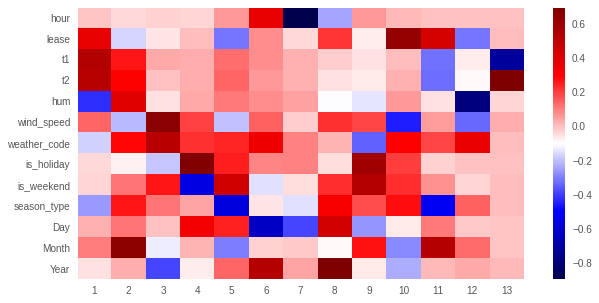

In [214]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='seismic', aspect='auto')
plt.yticks(range(len(nybq4.columns)), nybq4.columns)
plt.xticks(range(len(nybq4.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

In [215]:
modelo_pca.n_components_

13

In [216]:
np.arange(len(nybq4.columns)) + 1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

<BarContainer object of 13 artists>

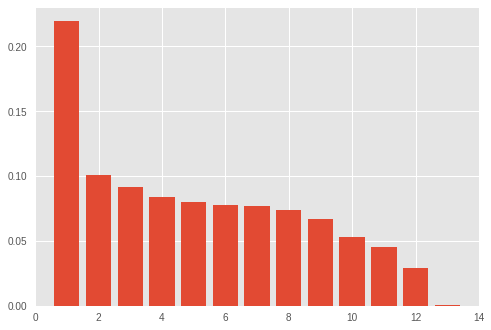

In [217]:
plt.bar(x=np.arange(len(nybq4.columns)) + 1,height=modelo_pca.explained_variance_ratio_)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.21939681 0.10103672 0.09156483 0.0841005  0.08000104 0.0777709
 0.07699173 0.07365612 0.06708389 0.05297169 0.04562197 0.02910015
 0.00070368]


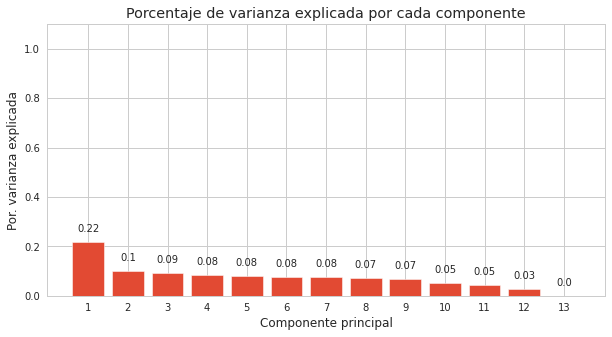

In [218]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)
import seaborn as sns
sns.set_style("whitegrid")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)
# texto
for x, y in zip(np.arange(len(nybq4.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

En este caso, la primera componente explica el 22% de la varianza observada en los datos y la segunda el 10%.

In [219]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
prop_varianza_acum

array([0.21939681, 0.32043352, 0.41199835, 0.49609885, 0.57609989,
       0.65387078, 0.73086251, 0.80451863, 0.87160252, 0.92457421,
       0.97019617, 0.99929632, 1.        ])

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.21939681 0.32043352 0.41199835 0.49609885 0.57609989 0.65387078
 0.73086251 0.80451863 0.87160252 0.92457421 0.97019617 0.99929632
 1.        ]


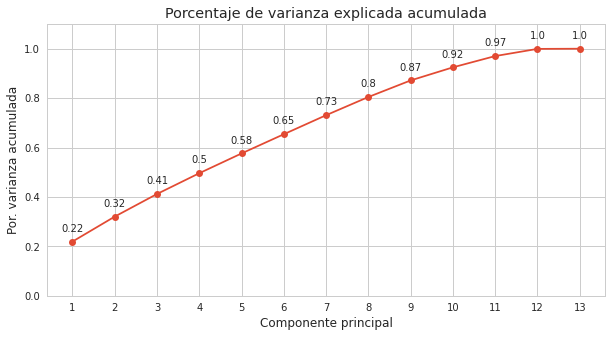

In [220]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.plot(
    np.arange(len(nybq4.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(nybq4.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Si se empleasen los primeros 4 componentes se conseguiría explicar el 50% de la varianza observada.

